

# QC Merged Data (earliest experiments 01 - 28)

Merge the datasets from the different experiments and QC them to get a combined dataset for downstream analysis.
01, 03, 06, 09, 10, 12, 18, 19, 20, 21, 22, 23, 24, 27, 28

To then be added to already merged data for experiments 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45.

In [1]:
library(knitr)
knitr::opts_chunk$set(dev = "CairoPNG")
library(tidyverse)
library(viridis)
library(ggthemes, quietly = TRUE)
library(ggbeeswarm)
library(ggridges)
library(cowplot)
library(scater)
library(scran)
library(SingleCellExperiment)
library(DT)
# library(future)
library(pryr)
if (interactive()) {
    rmote::rmote_on(server_dir="/hps/nobackup/hipsci/scratch/singlecell_endodiff/figures/servr")
rmote::rmote_device(width = 900, height = 600)
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: viridisLite

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggthemes’:

    theme_map

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are mas


# Load data

Load the data from the individual experiments that we will merge.



In [2]:
expts <- c("01", "03", "06", "09", "10", "12", "18", "19", "20", "21", "22", "23", "24", "27")
sce_objects <- paste0("sce_expt", expts)
sce_list <- list()
for(ex in expts) {
    rdata_file <- file.path(paste0("../../data_processed/expt", ex),
                            paste0("sceset_expt", ex,
                                   "_salmon_allmeta_allcells.rds"))
    cat("Experiment ", ex, "\n")
    cat("...........", rdata_file, "\n")
    sce_list[[paste0("sce_expt", ex)]] <- readRDS(rdata_file)
}
for(obj in names(sce_list)) {
    rowData(sce_list[[obj]])$gene_strand <- rowData(sce_list[[obj]])$strand
    rowData(sce_list[[obj]])$strand <- NULL
}
for(obj in names(sce_list)) {
    rowData(sce_list[[obj]]) <- rowData(sce_list[[obj]])[, 1:10]
}
colnames_coldata <- list()
for(obj in names(sce_list)) {
    colnames_coldata[[obj]] <- colnames(colData(sce_list[[obj]]))
}
common_coldatanames <- Reduce(intersect, colnames_coldata)
for(obj in names(sce_list)) {
    colData(sce_list[[obj]]) <- colData(sce_list[[obj]])[, common_coldatanames]
}

sce <- do.call("cbind", sce_list)
sce

Experiment  01 
........... ../../data_processed/expt01/sceset_expt01_salmon_allmeta_allcells.rds 
Experiment  03 
........... ../../data_processed/expt03/sceset_expt03_salmon_allmeta_allcells.rds 
Experiment  06 
........... ../../data_processed/expt06/sceset_expt06_salmon_allmeta_allcells.rds 
Experiment  09 
........... ../../data_processed/expt09/sceset_expt09_salmon_allmeta_allcells.rds 
Experiment  10 
........... ../../data_processed/expt10/sceset_expt10_salmon_allmeta_allcells.rds 
Experiment  12 
........... ../../data_processed/expt12/sceset_expt12_salmon_allmeta_allcells.rds 
Experiment  18 
........... ../../data_processed/expt18/sceset_expt18_salmon_allmeta_allcells.rds 
Experiment  19 
........... ../../data_processed/expt19/sceset_expt19_salmon_allmeta_allcells.rds 
Experiment  20 
........... ../../data_processed/expt20/sceset_expt20_salmon_allmeta_allcells.rds 
Experiment  21 
........... ../../data_processed/expt21/sceset_expt21_salmon_allmeta_allcells.rds 
Experiment

class: SingleCellExperiment 
dim: 39385 14589 
metadata(0):
assays(2): tpm counts
rownames(39385): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ERCC-00170_NA ERCC-00171_NA
rowData names(10): exprs_collapsed_to ensembl_transcript_id ...
  feature_symbol feature_id
colnames(14589): 20416_1#1 20416_1#10 ... 22710_8#98 22710_8#99
colData names(112): salmon_version samp_type ... pct_counts_MT
  is_cell_control
reducedDimNames(0):
spikeNames(0):

In [3]:
sce

class: SingleCellExperiment 
dim: 39385 14589 
metadata(0):
assays(2): tpm counts
rownames(39385): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ERCC-00170_NA ERCC-00171_NA
rowData names(10): exprs_collapsed_to ensembl_transcript_id ...
  feature_symbol feature_id
colnames(14589): 20416_1#1 20416_1#10 ... 22710_8#98 22710_8#99
colData names(112): salmon_version samp_type ... pct_counts_MT
  is_cell_control
reducedDimNames(0):
spikeNames(0):

In [26]:
#names(colData(sce))

In [3]:
# install.packages("pryr")
# library(pryr)

In [4]:
mem_used()

18.8 GB

In [5]:
rm(sce_list)


Experiments included in this dataset:



In [6]:
unique(sce$experiment)

[1] "expt_01" "expt_03" "expt_06" "expt_09" "expt_10" "expt_12" "expt_18"
 [8] "expt_19" "expt_20" "expt_21" "expt_22" "expt_23" "expt_24" "expt_27"


Save this object with everything to disk.



In [30]:
saveRDS(object = sce, file = "../../data_processed/merged/20180601/sce_merged_preqc_01to28.rds")


Given there are such enormous discrepancies in ERCC levels between experiments we will remove the ERCC genes from consideration.



In [11]:
sce <- sce[!grepl("^ERCC", rownames(sce)),]


## Load full dataset



In [31]:
sce <- readRDS("../../data_processed/merged/20180601/sce_merged_preqc_01to28.rds")


Size of `SingleCellExperiment` object in memory:



In [6]:
object_size(sce)

10.2 GB

In [7]:
sce

class: SingleCellExperiment 
dim: 39385 16125 
metadata(0):
assays(2): tpm counts
rownames(39385): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ERCC-00170_NA ERCC-00171_NA
rowData names(10): exprs_collapsed_to ensembl_transcript_id ...
  feature_symbol feature_id
colnames(16125): 20416_1#1 20416_1#10 ... 22710_2#98 22710_2#99
colData names(112): salmon_version samp_type ... pct_counts_MT
  is_cell_control
reducedDimNames(0):
spikeNames(0):


## Define endoderm differentiation genes

We define a set of known pluripotency and endoderm differentiation genes that we want
to retain and focus on in downstream analyses.



In [8]:
pluri_markers <- c("ENSG00000111704_NANOG", "ENSG00000204531_POU5F1",
                   "ENSG00000164362_TERT", "ENSG00000181449_SOX2",
                   "ENSG00000121570_DPPA4")
pluri_markers_select <- c("ENSG00000111704_NANOG", "ENSG00000204531_POU5F1",
                          "ENSG00000181449_SOX2")
mesendo_markers <- c("ENSG00000164458_T", "ENSG00000163508_EOMES",
                     "ENSG00000185155_MIXL1")
defendo_markers <- c("ENSG00000121966_CXCR4", "ENSG00000136574_GATA4",
                     "ENSG00000141448_GATA6", "ENSG00000125798_FOXA2",
                     "ENSG00000164736_SOX17", "ENSG00000133937_GSC",
                     "ENSG00000147869_CER1", "ENSG00000132130_LHX1")
defendo_markers_select <- c("ENSG00000121966_CXCR4", "ENSG00000136574_GATA4",
                            "ENSG00000164736_SOX17",
                            "ENSG00000147869_CER1", "ENSG00000132130_LHX1")
later_markers <- c("ENSG00000152804_HHEX", "ENSG00000170608_FOXA3")
diff_genes <- c(pluri_markers, mesendo_markers, defendo_markers, later_markers)


## Filter out very lowly-expressed genes

We filter out genes with extremely low gene expression values (<100
counts in total across all cells), but retain endoderm differentation
genes regardless, so that we can later track what is going on with
them.

Replace NA HGNC symbol for ERCCs with ERCC name.

The output below shows the nubmer of genes with/without HGNC symbols,
that are/aren't lowly expressed, and that are/aren't duplicated gene
symbols.



In [9]:
rowData(sce)$hgnc_symbol[is.na(rowData(sce)$hgnc_symbol)] <-
             rowData(sce)$feature_id[is.na(rowData(sce)$hgnc_symbol)]
missing_hgnc <- is.na(rowData(sce)$hgnc_symbol) | rowData(sce)$hgnc_symbol == ""
missing_hgnc[is.na(missing_hgnc)] <- TRUE
table(missing_hgnc)
low_genes <- (rowSums(counts(sce)) < 100)
table(low_genes)

missing_hgnc
FALSE  TRUE 
29501  9884 

low_genes
FALSE  TRUE 
28155 11230 

In [10]:
dup_gene <- duplicated(rowData(sce)$hgnc_symbol)
table(dup_gene)

dup_gene
FALSE  TRUE 
26370 13015 


Filter out genes with no HGNC symbol and retain just one gene for each
HGNC symbol. The table below shows the number of retained genes (TRUE)
and filtered genes (FALSE).



In [11]:
keep_gene <- ((rownames(sce) %in% diff_genes) | !(missing_hgnc | low_genes | dup_gene))
table(keep_gene)
#length(grep("^ERCC", rownames(sce)[keep_gene]))
#all(diff_genes %in% rownames(sce)[keep_gene])
sce <- sce[keep_gene,]
sce

keep_gene
FALSE  TRUE 
18602 20783 

class: SingleCellExperiment 
dim: 20783 16125 
metadata(0):
assays(2): tpm counts
rownames(20783): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ERCC-00170_NA ERCC-00171_NA
rowData names(10): exprs_collapsed_to ensembl_transcript_id ...
  feature_symbol feature_id
colnames(16125): 20416_1#1 20416_1#10 ... 22710_2#98 22710_2#99
colData names(112): salmon_version samp_type ... pct_counts_MT
  is_cell_control
reducedDimNames(0):
spikeNames(0):


This substantially reduces the size of the `SingleCellExperiment`
object in memory.



In [12]:
object_size(sce)

5.4 GB


Merged dataset across all experiments sequenced so far contains data
for ~20,000 cells. These cells need serious QC before use.

We have many missing days for earlier experiments, but most later
experiments have data from all differentiation days.



In [13]:
table(sce$experiment, sce$day)

         
          day0 day1 day2 day3
  expt_01    0    0    0  384
  expt_03  384    0    0  384
  expt_06    0  384  384  384
  expt_09    0  384    0    0
  expt_10    0  384    0  384
  expt_12  384    0    0    0
  expt_18  384  384    0    0
  expt_19  384  384  384  384
  expt_20  384  384    0    0
  expt_21  384  384  384  384
  expt_22  384  384  384  384
  expt_23  384  384  384  384
  expt_24  381  384  384    0
  expt_27  768  384  384  384
  expt_28  384  384  384  384



# Calculate QC metrics

We calculate QC metrics, using ERCC and mitochondrial genes as feature
controls and bulk and control wells as cell controls.



In [40]:
#names(colData(sce))

In [14]:
table(sce$well_type)
sce$well_type[is.na(sce$well_type)] <- "single cell"
sce$well_type[is.na(sce$well_type) &
              sce$well_id %in% c("A01", "P01", "A24", "B24", "C24", "D24",
                                 "E24", "F24")] <- "bulk"
sce$well_type[sce$well_id %in% c("P21", "P22", "P23", "P24")] <- "control"
sce$well_type[sce$well_type == "empty"] <- "control"


       bulk     control       empty single cell 
        321         152          16       15636 

In [15]:
ercc_genes <- grepl("^ERCC", rownames(sce))
mt_genes <- grepl("^MT-", rowData(sce)$hgnc_symbol)
sce <- calculateQCMetrics(sce,
    feature_controls = list(ERCC = ercc_genes, MT = mt_genes),
    cell_controls = list(bulk = (sce$well_type == "bulk"),
                         control = (sce$well_type == "control")))

In [43]:
saveRDS(object = sce, file = "../../data_processed/merged/20180601/sce_merged_preqc_01to28_with_qc_metrics.rds")

In [1]:
sce <- readRDS("../../data_processed/merged/20180601/sce_merged_preqc_01to28_with_qc_metrics.rds")




# QC plots

## Plots of control wells




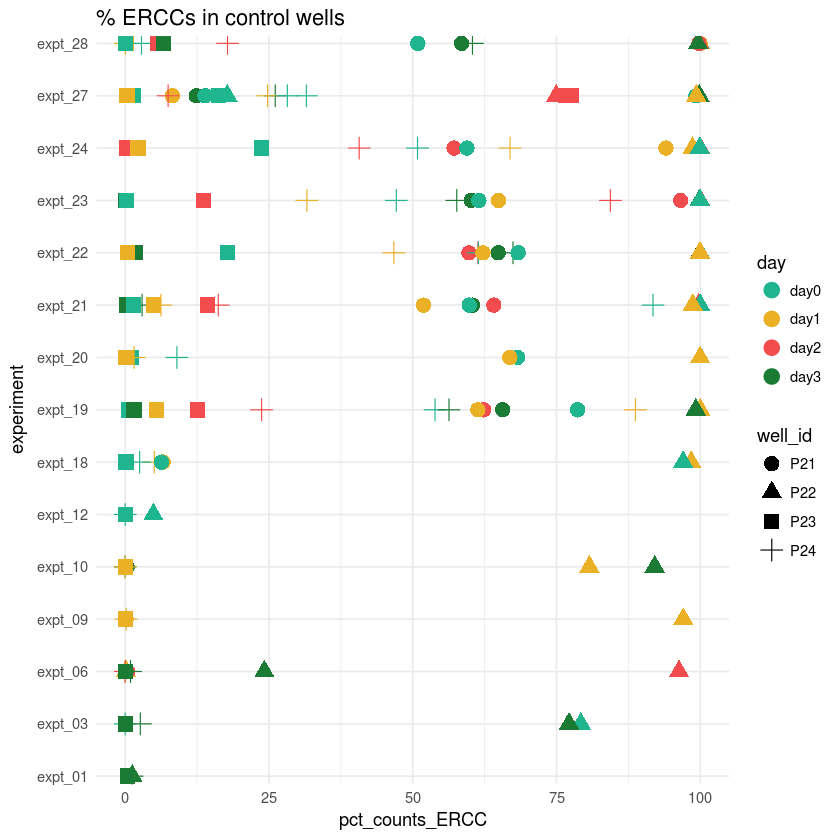

In [4]:
ggplot(as.data.frame(colData(sce)[sce$well_type == "control",]),
       aes(x = pct_counts_ERCC, y = experiment, color = day,
           shape = well_id)) +
    geom_point(size = 4) +
    scale_color_canva(palette = "Tropical tones") +
    ggtitle("% ERCCs in control wells") +
   scale_y_discrete(expand = c(0.01, 0))  + theme_minimal()


P21 and P23 are positive controls; P22 and P24 are negative controls. ERCCs in A1, P21, P22, no ERCCS in P23, P24.



In [5]:
sce$control_type <- NA
sce$control_type[sce$well_id %in% c("P21", "P23")] <- "pos_ctl"
sce$control_type[sce$well_id %in% c("P22", "P24")] <- "neg_ctl"

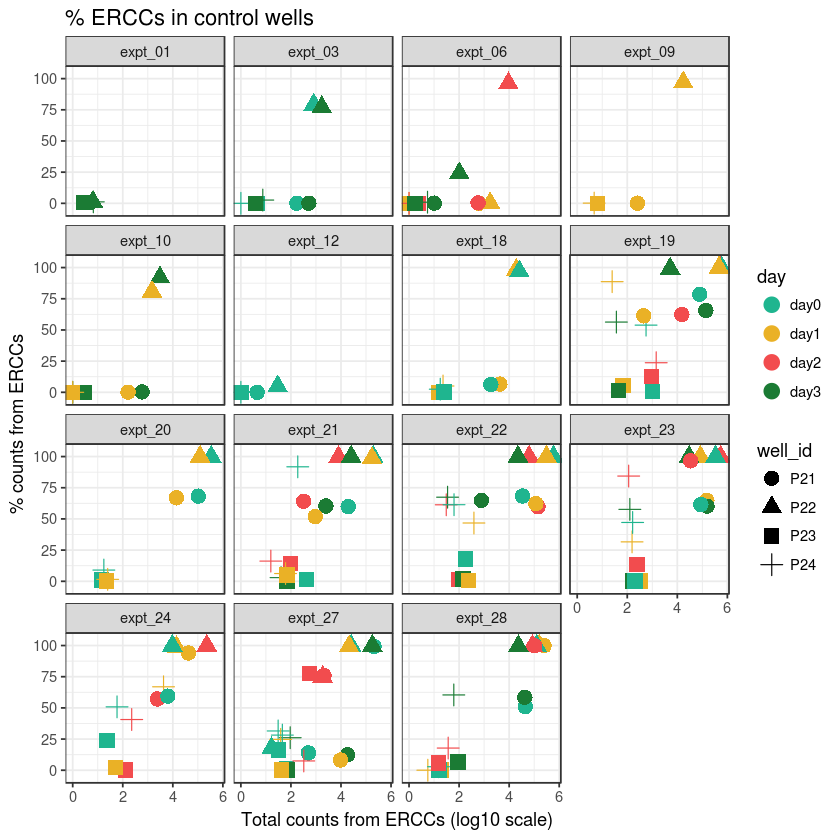

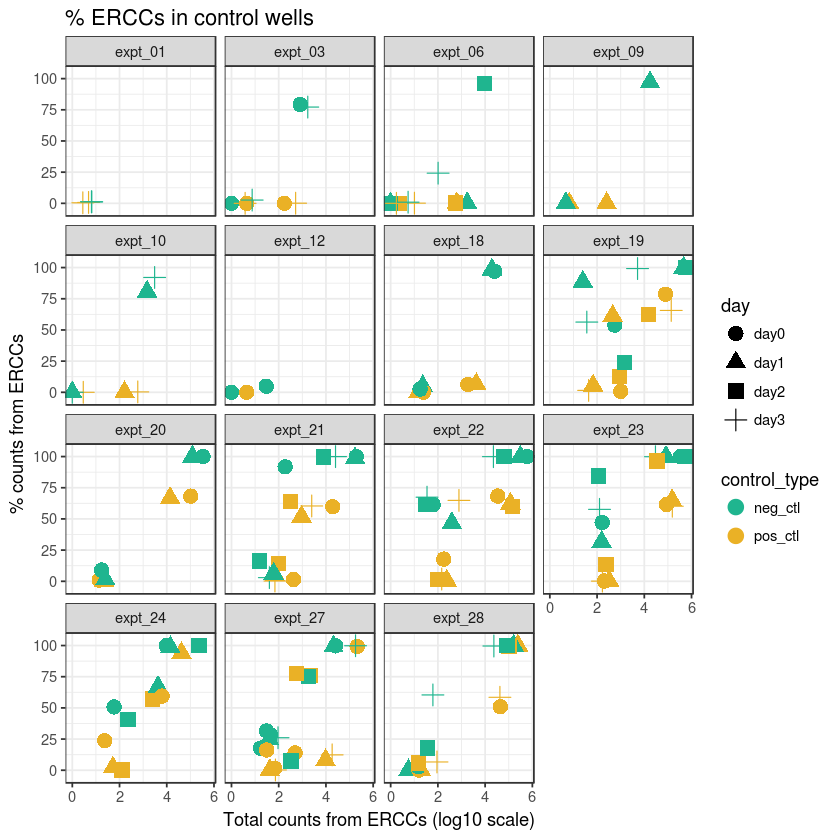

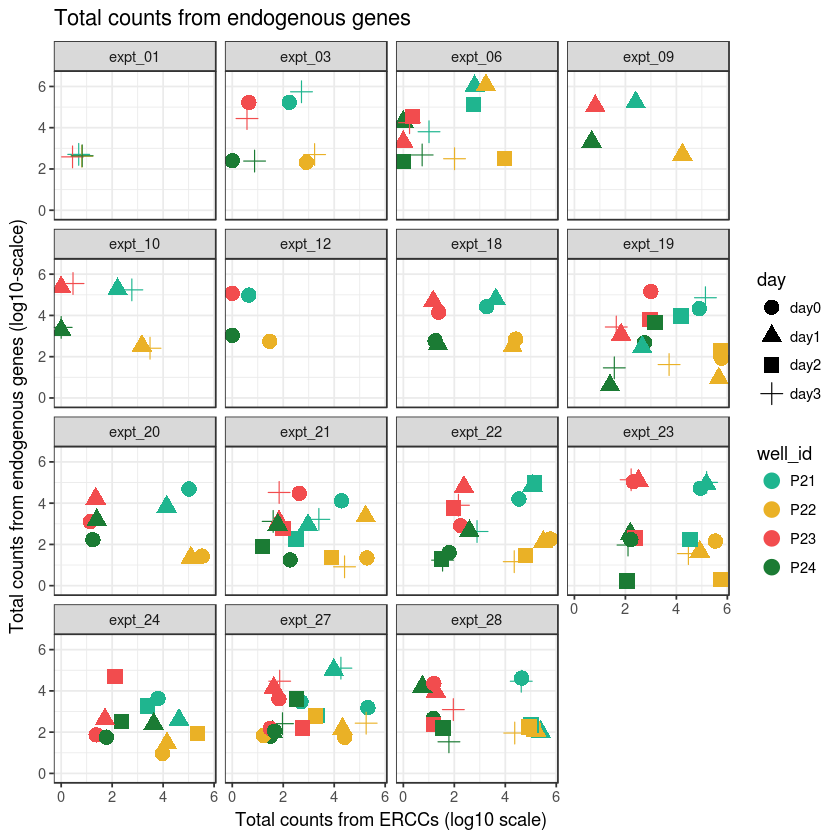

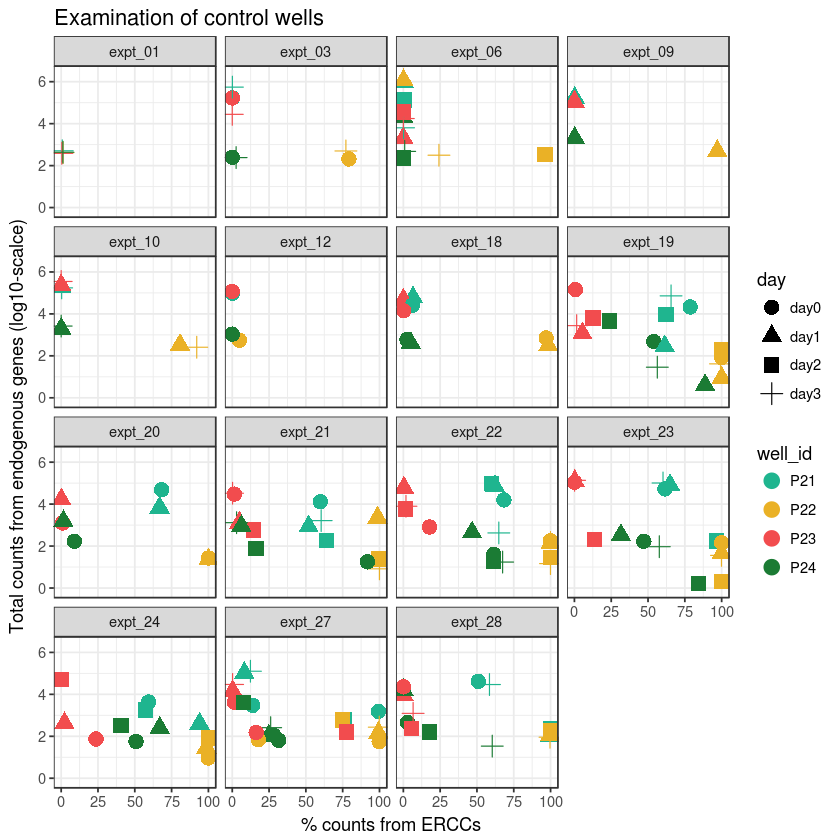

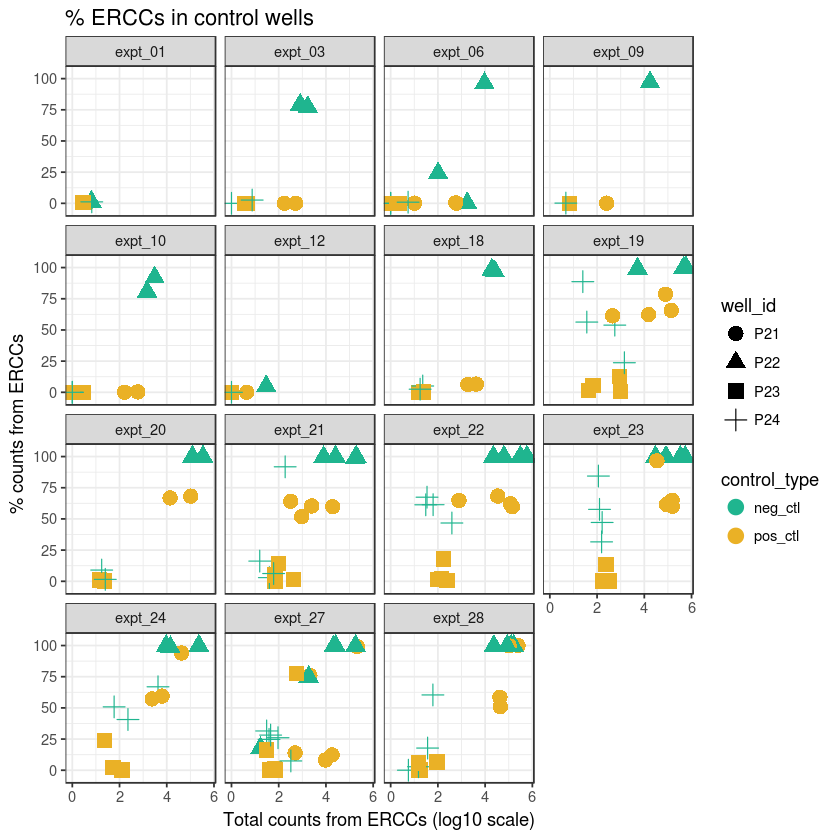

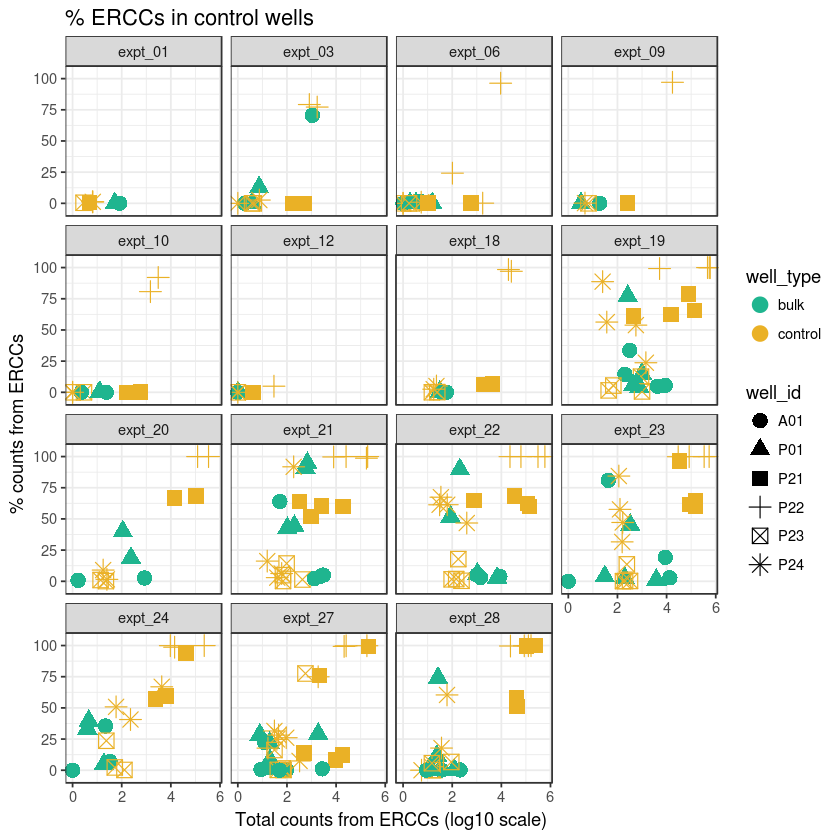

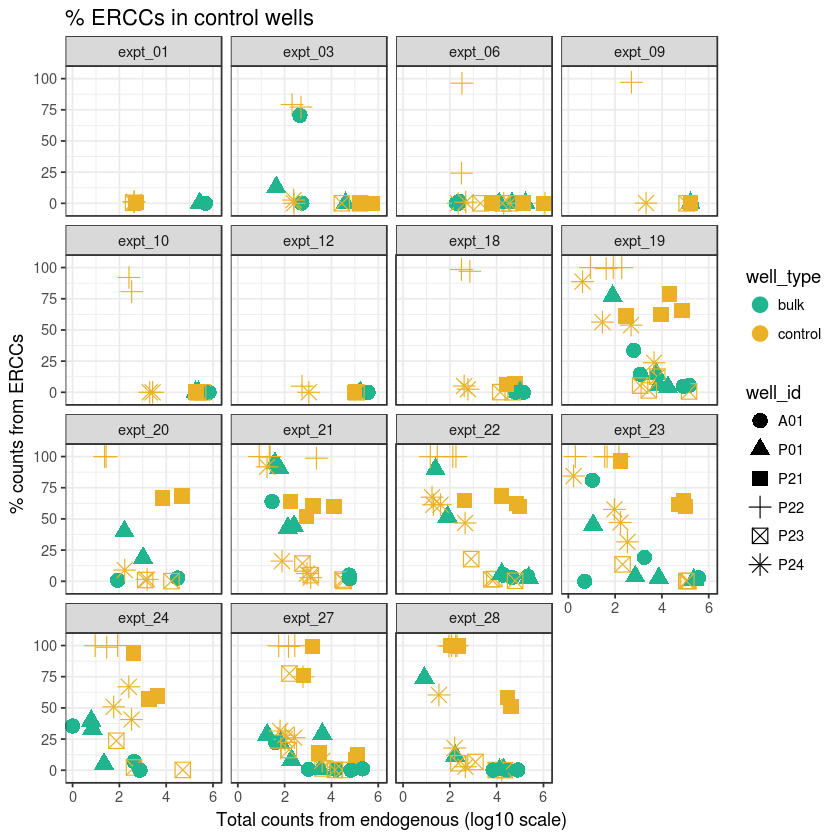

In [6]:
ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = pct_counts_ERCC,
           x = log10_total_counts_ERCC, color =  day, shape = well_id)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()

ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = pct_counts_ERCC, x = log10_total_counts_ERCC,
           color =  control_type, shape = day)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()

ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = log10_total_counts_endogenous, x = log10_total_counts_ERCC,
           color =  well_id, shape = day)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("Total counts from endogenous genes (log10-scalce)") +
    xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("Total counts from endogenous genes") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()

ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = log10_total_counts_endogenous, x = pct_counts_ERCC,
           color =  well_id, shape = day)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("Total counts from endogenous genes (log10-scalce)") +
    xlab("% counts from ERCCs") +
    ggtitle("Examination of control wells") +
    scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()


ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = pct_counts_ERCC, x = log10_total_counts_ERCC,
           color =  control_type, shape = well_id)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()


ggplot(as.data.frame(colData(sce))[sce$well_id %in% c("A01", "P01", "P21", "P22", "P23", "P24"),],
       aes(y = pct_counts_ERCC, x = log10_total_counts_ERCC,
           color = well_type, shape = well_id)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()


ggplot(as.data.frame(colData(sce))[sce$well_id %in% c("A01", "P01", "P21", "P22", "P23", "P24"),],
       aes(y = pct_counts_ERCC, x = log10_total_counts_endogenous, color = well_type, shape = well_id)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from endogenous (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()



## Distributions of QC metrics across days



In [7]:
library(RColorBrewer)
col_list = c(brewer.pal(8,"Set1"), brewer.pal(8,"Set2"), brewer.pal(12,"Set3"), brewer.pal(12,"Paired"),
             brewer.pal(9,"Pastel1"), brewer.pal(8,"Pastel2"), brewer.pal(8,"Dark2"), brewer.pal(8,"Accent"))

Picking joint bandwidth of 1.81
Picking joint bandwidth of 1.84
Picking joint bandwidth of 1.88
Picking joint bandwidth of 2.79


Picking joint bandwidth of 0.26
Picking joint bandwidth of 0.232
Picking joint bandwidth of 0.211
Picking joint bandwidth of 0.304


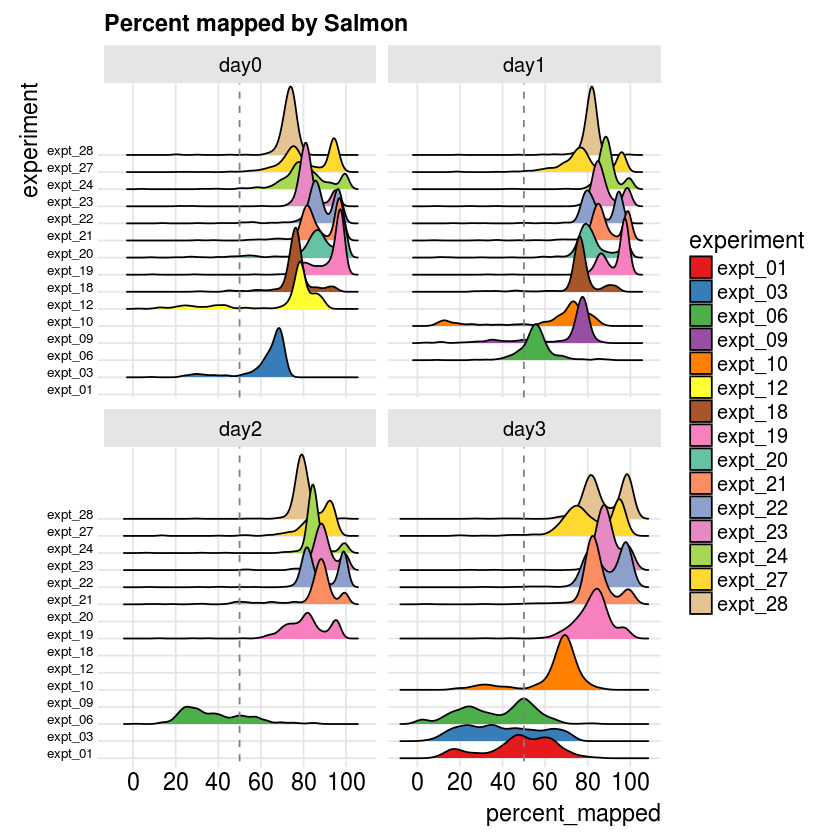

Picking joint bandwidth of 776
Picking joint bandwidth of 706
Picking joint bandwidth of 587
Picking joint bandwidth of 902


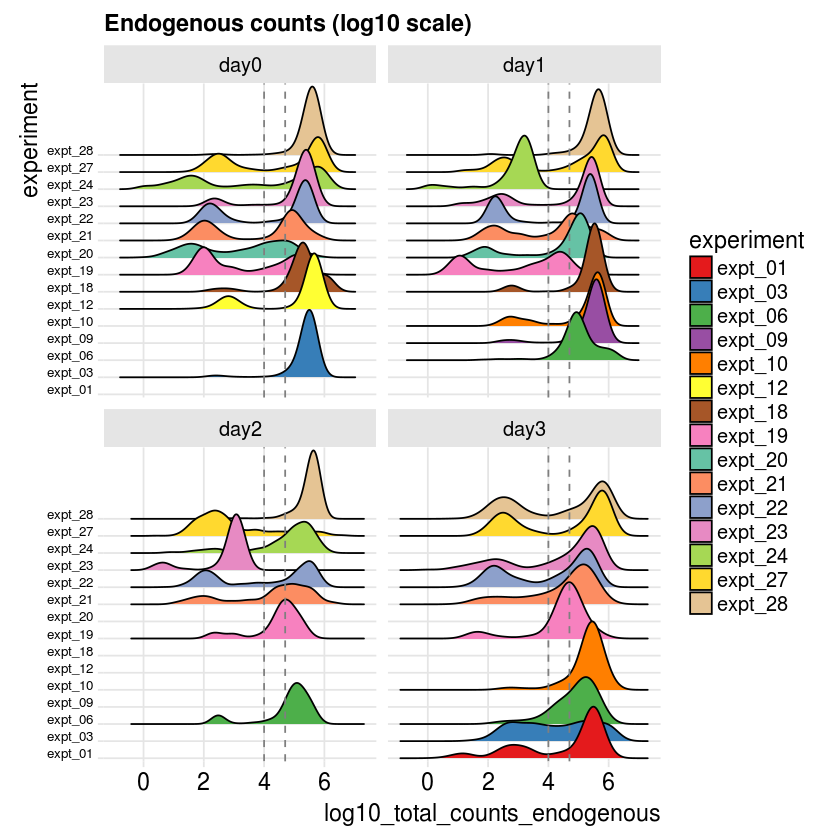

Picking joint bandwidth of 4.37
Picking joint bandwidth of 3.77
Picking joint bandwidth of 3.1
Picking joint bandwidth of 5.45


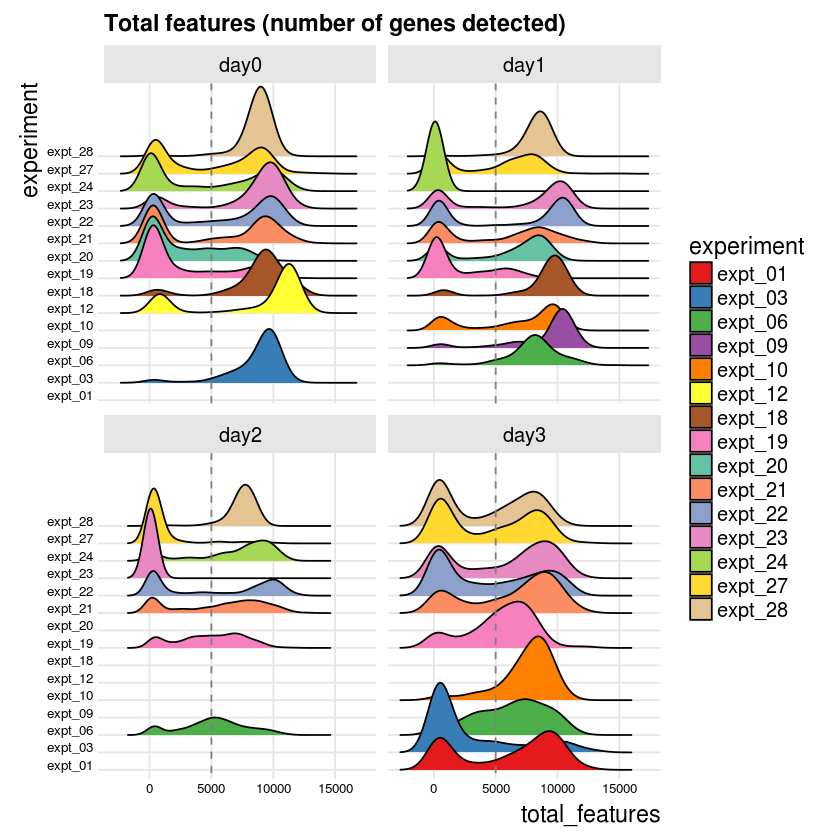

Picking joint bandwidth of 0.17
Picking joint bandwidth of 0.128
Picking joint bandwidth of 0.171
Picking joint bandwidth of 0.131


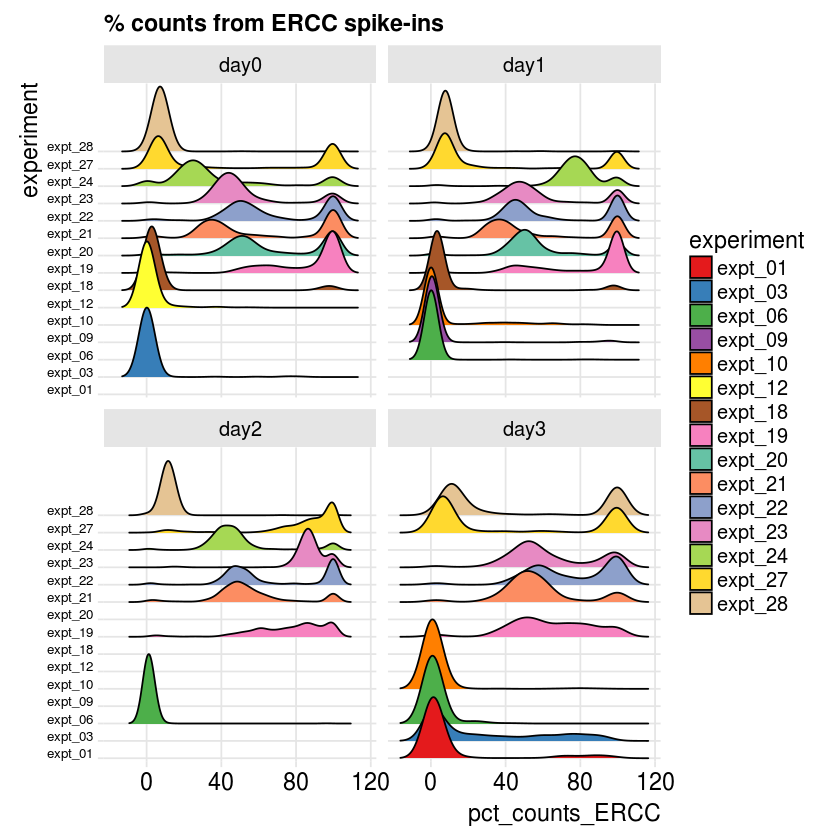

Picking joint bandwidth of 0.281
Picking joint bandwidth of 0.474
Picking joint bandwidth of 0.393
Picking joint bandwidth of 0.624


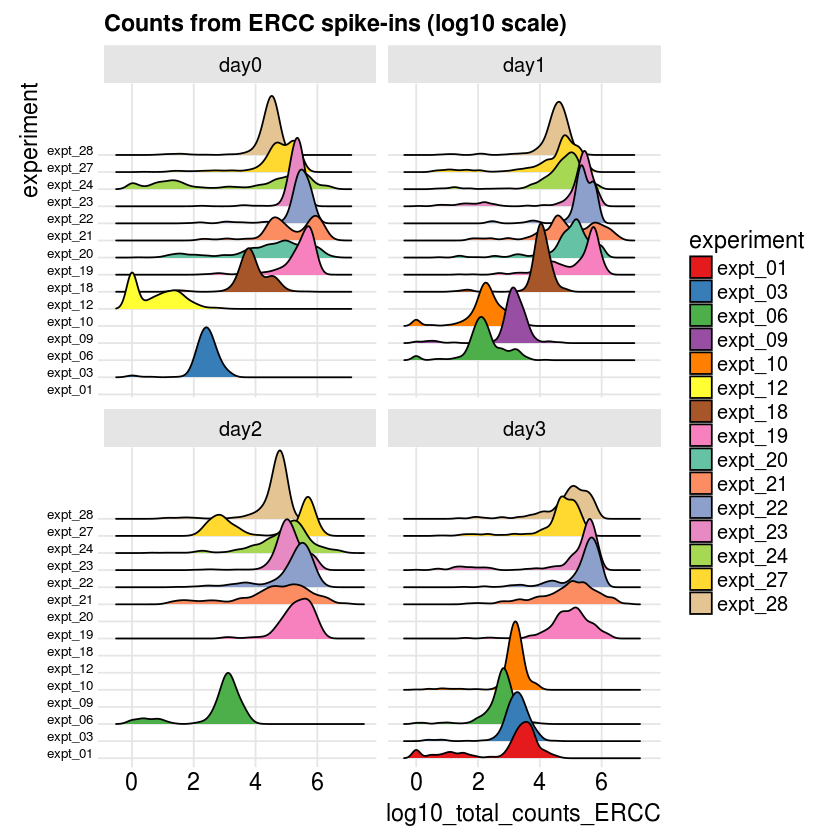

Picking joint bandwidth of 3.7
Picking joint bandwidth of 3.45
Picking joint bandwidth of 2.23
Picking joint bandwidth of 4.79


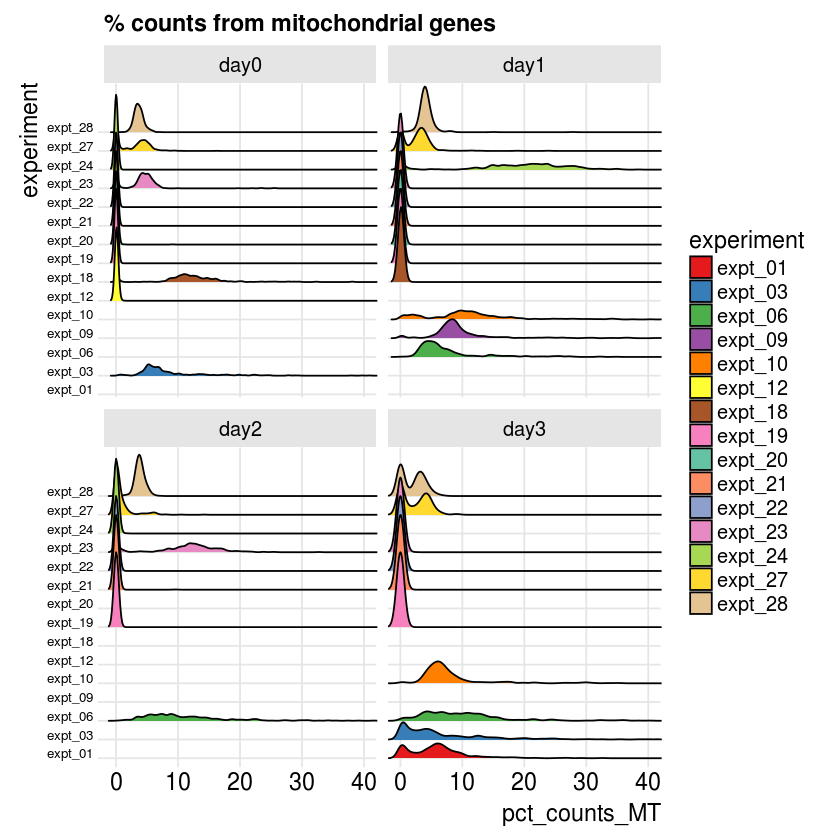

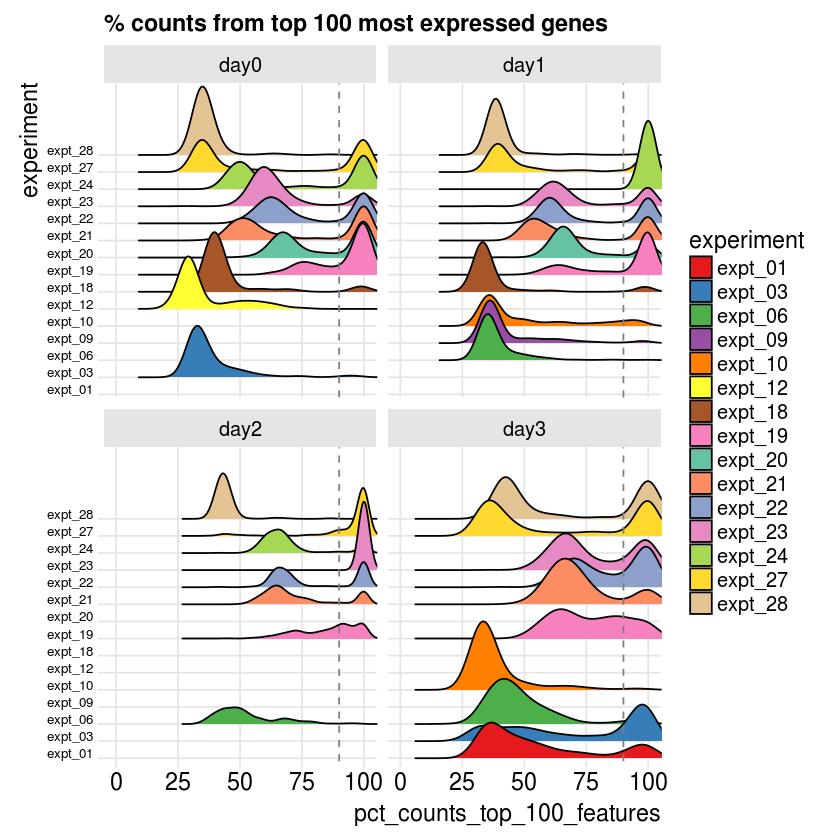

In [8]:
ggplot(as.data.frame(colData(sce)), aes(x = percent_mapped, y = experiment,
                         fill =  experiment)) +
    geom_density_ridges(scale = 4) + 
    geom_vline(xintercept = 50, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("Percent mapped by Salmon") +
    scale_x_continuous(breaks = c(0, 20, 40, 60, 80, 100)) +
    scale_y_discrete(expand = c(0.01, 0))   + # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))

ggplot(as.data.frame(colData(sce)), aes(x = log10_total_counts_endogenous, y = experiment,
                         fill =  experiment)) +
    geom_density_ridges(scale = 4) +
    geom_vline(xintercept = c(4, log10(50000)), linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("Endogenous counts (log10 scale)") +
    scale_y_discrete(expand = c(0.01, 0))  +  # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))


ggplot(as.data.frame(colData(sce)), aes(x = total_features, y = experiment, fill =  experiment)) +
    geom_density_ridges(scale = 4) + 
    geom_vline(xintercept = 5000, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("Total features (number of genes detected)") +
    scale_y_discrete(expand = c(0.01, 0))  +  # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8), axis.text.x = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))

ggplot(as.data.frame(colData(sce)),
       aes(x = pct_counts_ERCC, y = experiment, fill =  experiment)) +
    geom_density_ridges(scale = 4) + 
    #geom_vline(xintercept = 2500, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("% counts from ERCC spike-ins") +
    scale_y_discrete(expand = c(0.01, 0))   + # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))

ggplot(as.data.frame(colData(sce)), aes(x = log10_total_counts_ERCC,
                                        y = experiment, fill =  experiment)) +
    geom_density_ridges(scale = 4) + 
    #geom_vline(xintercept = 2500, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list)  +
    ggtitle("Counts from ERCC spike-ins (log10 scale)" ) +
    scale_y_discrete(expand = c(0.01, 0))  + # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))

ggplot(as.data.frame(colData(sce)), aes(x = pct_counts_MT,
                                        y = experiment, fill = experiment)) +
    geom_density_ridges(scale = 4) +
    #geom_vline(xintercept = 2500, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("% counts from mitochondrial genes") +
    coord_cartesian(xlim = c(0, 40)) +
    scale_y_discrete(expand = c(0.01, 0)) +   # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))


ggplot(as.data.frame(colData(sce)), aes(x = pct_counts_top_100_features,
                                        y = experiment, fill = experiment)) +
    geom_density_ridges(scale = 4) + 
    geom_vline(xintercept = 90, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("% counts from top 100 most expressed genes") +
    coord_cartesian(xlim = c(0, 100)) +
    scale_y_discrete(expand = c(0.01, 0)) +   # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))



## Endogenous counts against total counts



In [9]:
length( unique(sce$experiment))
expt_list <- unique(sce$experiment)

[1] 15

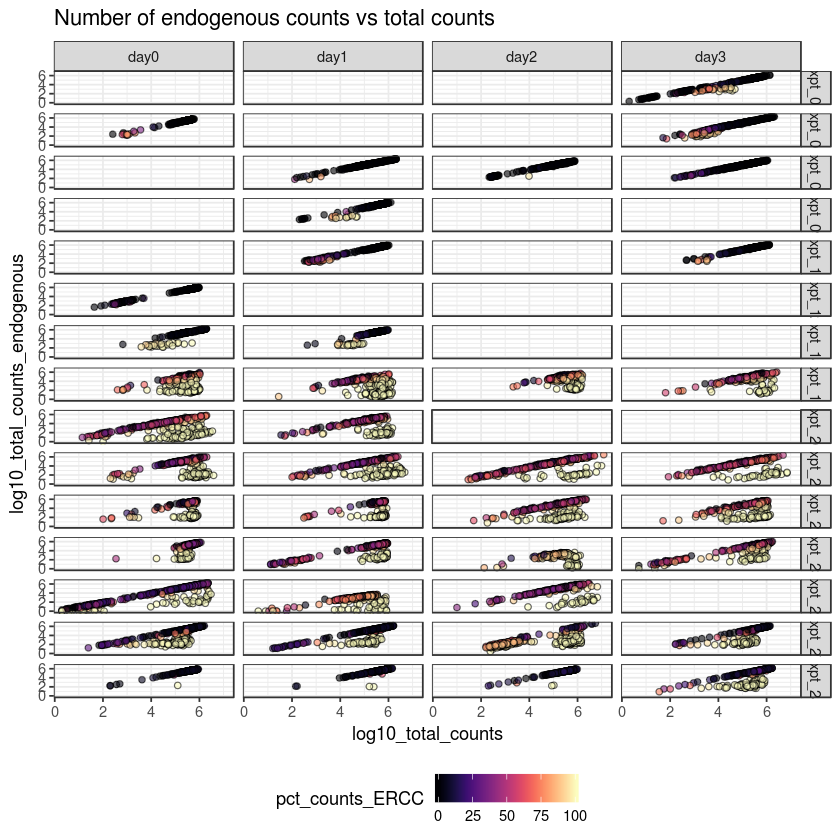

In [10]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts, y = log10_total_counts_endogenous,
           fill =  pct_counts_ERCC)) +
     geom_point(shape = 21, alpha= 0.6) +
     scale_fill_viridis(option = 'magma') +
     facet_grid(experiment ~ day) + ggtitle("Number of endogenous counts vs total counts") +
     theme_bw() + theme(legend.position = "bottom")


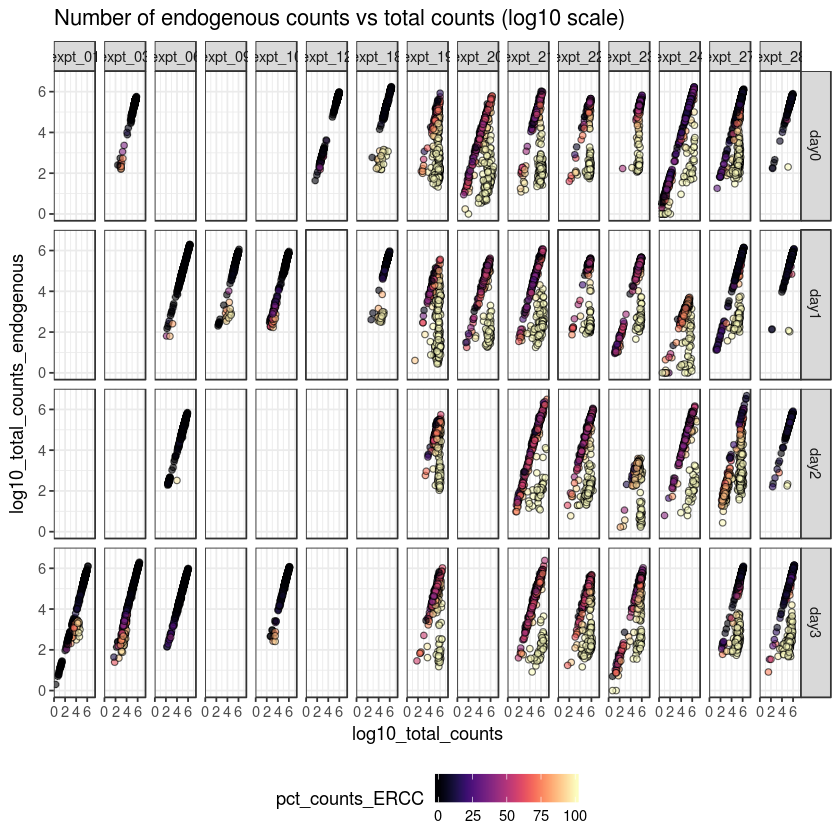

In [11]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts, y = log10_total_counts_endogenous,
           fill =  pct_counts_ERCC)) +
     geom_point(shape = 21, alpha= 0.6) +
     scale_fill_viridis(option = 'magma') +
     facet_grid(day ~ experiment) + ggtitle("Number of endogenous counts vs total counts (log10 scale)") +
     theme_bw() + theme(legend.position = "bottom")


## Percent of reads mapped vs total counts

Plot number of expressed features against total counts, with cells coloured by
different QC metrics:



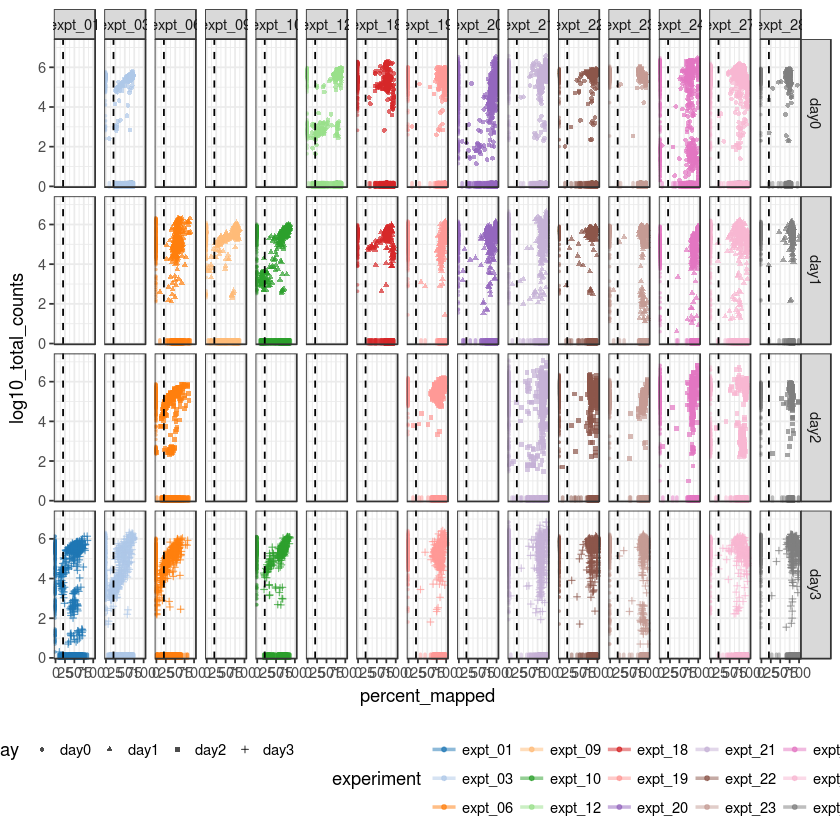

In [12]:
p1 <- plotPhenoData(sce, aes(x = percent_mapped, y = log10_total_counts,
              colour = experiment, shape = day)) +
theme(legend.position = "bottom") +
geom_vline(xintercept = 20, linetype = 2) +
facet_grid(day ~ experiment)
p1 + theme_bw() + theme(legend.position = "bottom")

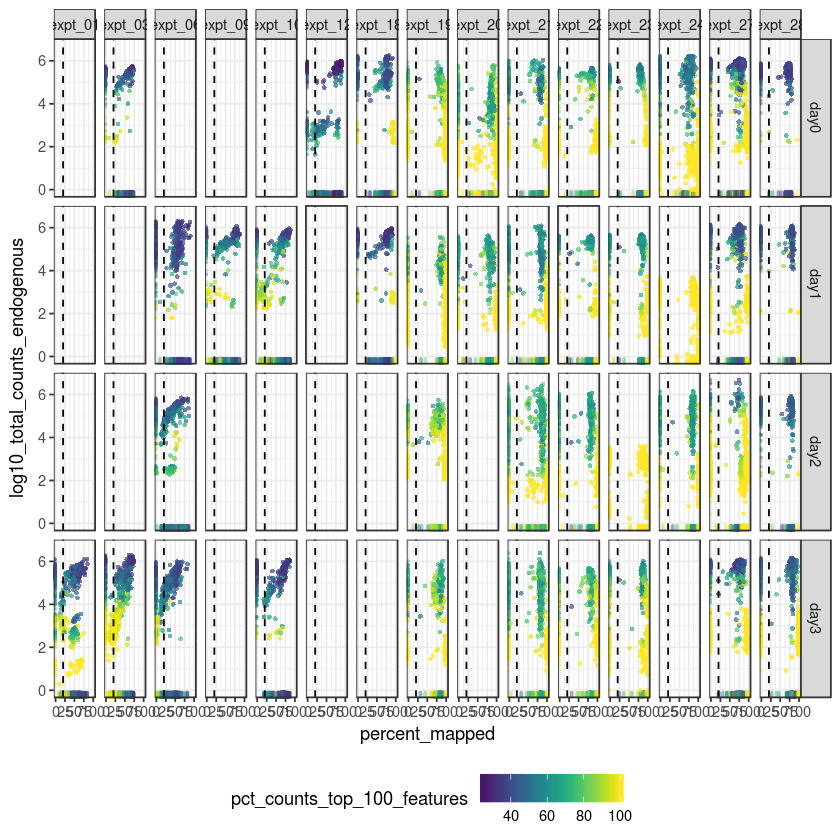

In [13]:
plotPhenoData(sce, aes(x = percent_mapped, y = log10_total_counts_endogenous,
                  colour = pct_counts_top_100_features)) +
    theme(legend.position = "bottom") +
    geom_vline(xintercept = 20, linetype = 2) +
    facet_grid(day ~ experiment) + theme_bw() + theme(legend.position = "bottom")


## Expressed genes vs total counts

Plot number of expressed features against total counts, with cells coloured by
different QC metrics:



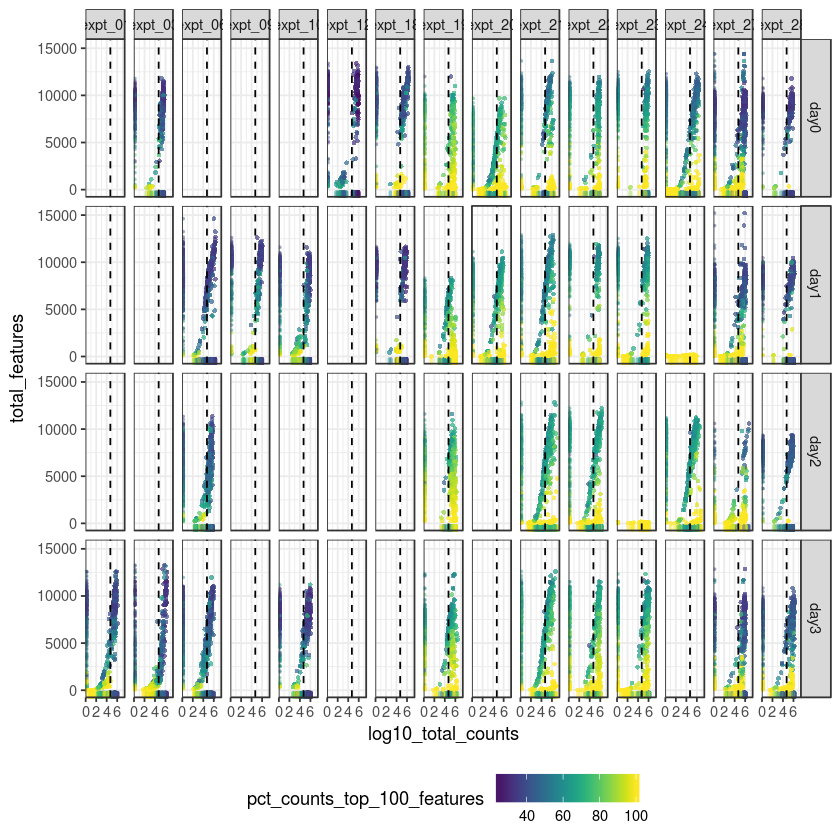

In [14]:
plotPhenoData(sce, aes(x = log10_total_counts, y = total_features,
                  colour =  pct_counts_top_100_features)) +
    facet_grid(day ~ experiment) +
    geom_vline(xintercept = log10(50000), linetype = 2) + theme_bw() +
    theme(legend.position = "bottom")


## Expressed genes vs endogenous counts

Plot number of expressed features against total counts, with cells coloured by
different QC metrics:



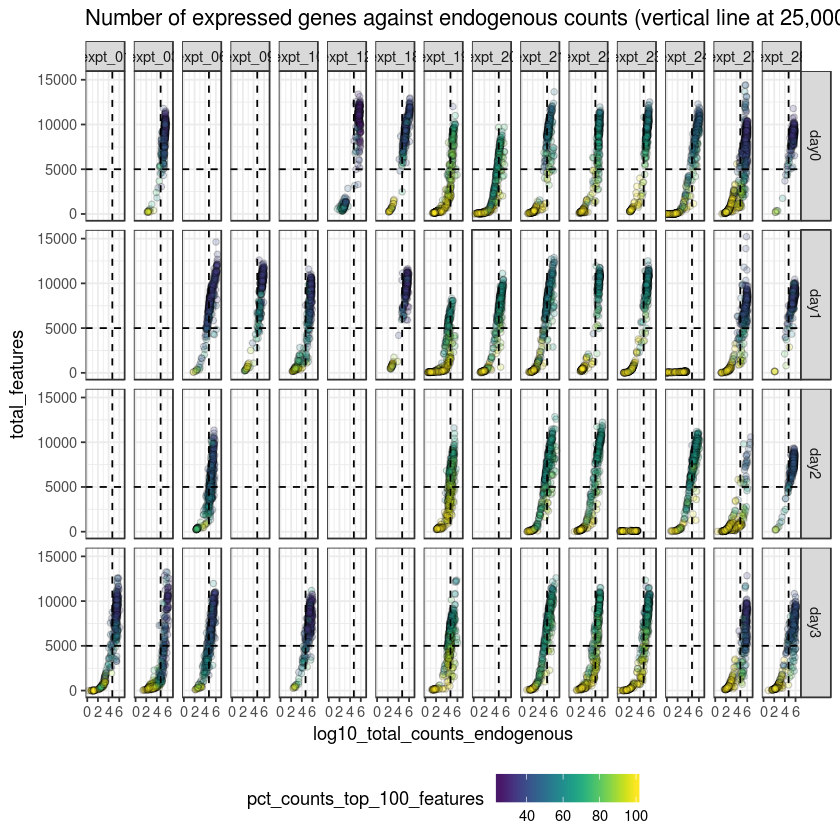

In [15]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts_endogenous, y = total_features,
                  fill =  pct_counts_top_100_features)) +
    geom_point(alpha = 0.2, shape = 21) +
    scale_fill_viridis() +
    facet_grid(day ~ experiment) +
    ggtitle("Number of expressed genes against endogenous counts (vertical line at 25,000 endogenous counts)") +
    theme(legend.position = "bottom") +
    geom_hline(yintercept = 5000, linetype = 2) +
    geom_vline(xintercept = log10(50000), linetype = 2) + theme_bw() + theme(legend.position = "bottom")


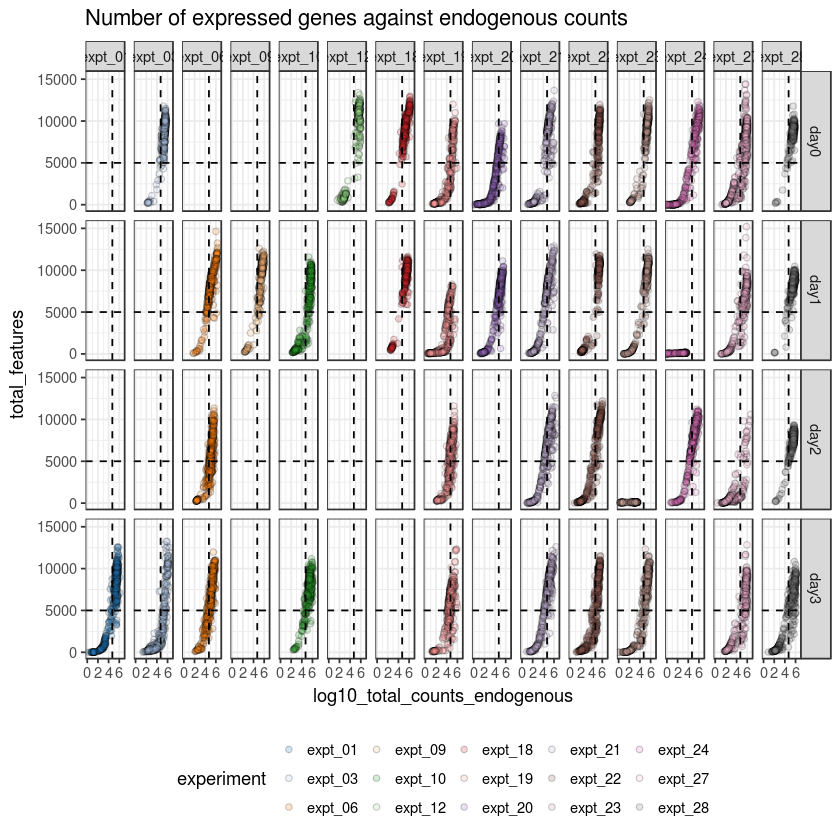

In [16]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts_endogenous, y = total_features,
           fill =  experiment)) +
    geom_point(alpha = 0.2, shape = 21) +
    scale_fill_tableau(palette = "tableau20") +
    facet_grid(day ~ experiment) + ggtitle("Number of expressed genes against endogenous counts") +
    theme(legend.position = "bottom") +
    geom_hline(yintercept = 5000, linetype = 2) +
    geom_vline(xintercept = log10(50000), linetype = 2) + theme_bw() + theme(legend.position = "bottom")



## Cumulative Expression Plots

The cumulative expression plot (with cells coloured by total number of
genes from endogenous genes) shows a handful of low complexity
libraries and otherwise a range of library complexities associated
with the percentage of expression accounted for by feature controls.



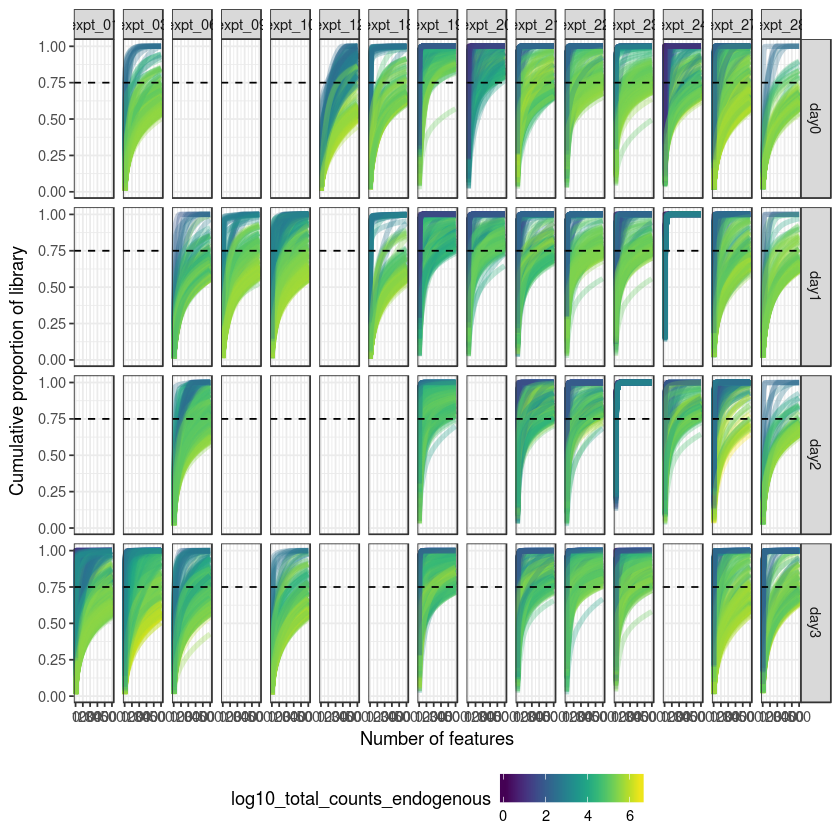

In [16]:
plotScater(sce, exprs_values = "counts", block1 = "experiment", block2 = "day",
           colour_by = "log10_total_counts_endogenous") +
    geom_hline(yintercept = 0.75, linetype = 2) +
    theme_bw() + theme(legend.position = "bottom")


## Most expressed genes

Plot the most expressed genes across each dataset. We have already filtered out ERCC spike-in genes, which have very high expression in the 12 plates from Expt 19, Expt 21 and Expt 22. Many MT and ribosomal genes appear, along with *ACTB* and *GAPDH*, as expected.



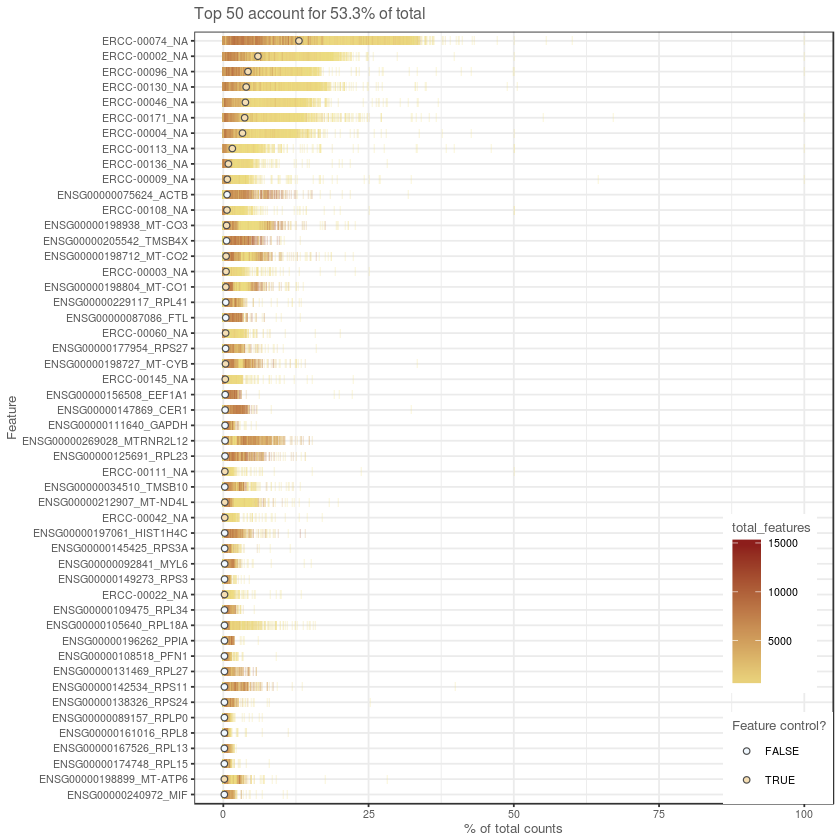

In [17]:
plotQC(sce)


## PCA on QC metrics with outlier detection

Another option available in `scater` is to conduct PCA on a set of QC metrics.
The advantage of doing this is that the QC metrics focus on technical aspects of
the libraries that are likely to distinguish problematics cells. Automatic
outlier detection on PCA plots using QC metrics is available to help identify
potentially problematic cells.

We use the following metrics for PCA-based outlier detection:

* `pct_counts_top_100_features`
* `total_features`
* `pct_counts_feature_controls_MT`
* `pct_counts_feature_controls_ERCC`
* `n_detected_feature_controls`
* `log10_counts_endogenous_features`
* `log10_counts_feature_controls`

A particular set of variables to be used can be specified with the
`selected_variables` argument as shown in the example below.



In [ ]:
#names(colData(sce))


In this case, the automatic outlier detection does not successfully identify as outliers those cells that we would want to filter out, so we will not use these outliers in the QC filtering steps below.



The following selected_variables were not found in colData(object): pct_counts_feature_controlsThe following selected_variables were not found in colData(object): total_features_feature_controlsThe following selected_variables were not found in colData(object): log10_total_counts_feature_controls
Other variables from colData(object) can be used by specifying a vector of variable names as the selected_variables argument.
PCA is being conducted using the following variables:pct_counts_top_100_featurestotal_featureslog10_total_counts_endogenous


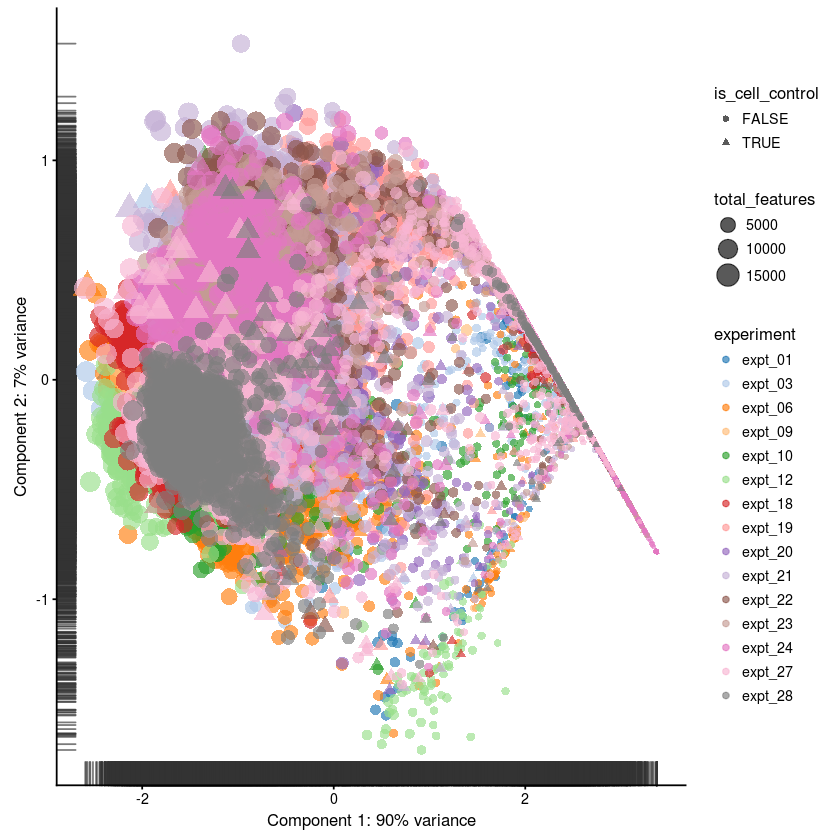

In [18]:
plotPCA(sce, size_by = "total_features", colour_by = "experiment",
        pca_data_input = "pdata", detect_outliers = FALSE)


The cells identified as outliers by the automatic outlier detection method here look like a subset of those that we would like to filter out on the basis of using multiple QC metrics simultaneously.

# Filter cells

Now we will proceed to filtering out potentially problematic cells. We apply the following criteria for filtering:

STRICT:
* total counts from endogenous features > 50,000
* total features > 5000 (and we also allow filter cells more than one MAD from the median for `total_features` in case that capture more cells)
* % counts from top 100 most expressed features < 90%
* % counts from MT genes < 15%
* mapping rate > 60%


We would usually also use the following criteria, but these are distorted by the enormous proportions of ERCC counts for Expt 19, Expt 21 and Expt 22:
* % counts from ERCC < 10%

We do not filter out cells identified as outlers by the automatic outlier detection method above, but do remove the mixed bulk, bulk and control wells from consideration too.

We also filter out cells for which the donor cell line remains "unknown".



In [19]:
sce

class: SingleCellExperiment 
dim: 20783 16125 
metadata(0):
assays(2): tpm counts
rownames(20783): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ERCC-00170_NA ERCC-00171_NA
rowData names(52): exprs_collapsed_to ensembl_transcript_id ...
  log10_total_counts_control pct_counts_control
colnames(16125): 20416_1#1 20416_1#10 ... 22710_2#98 22710_2#99
colData names(114): salmon_version samp_type ... is_cell_control_bulk
  is_cell_control_control
reducedDimNames(0):
spikeNames(0):

In [20]:
sce <- sce[!grepl("^ERCC", rownames(sce)),]

In [21]:
table(sce$experiment, sce$day)

         
          day0 day1 day2 day3
  expt_01    0    0    0  384
  expt_03  384    0    0  384
  expt_06    0  384  384  384
  expt_09    0  384    0    0
  expt_10    0  384    0  384
  expt_12  384    0    0    0
  expt_18  384  384    0    0
  expt_19  384  384  384  384
  expt_20  384  384    0    0
  expt_21  384  384  384  384
  expt_22  384  384  384  384
  expt_23  384  384  384  384
  expt_24  381  384  384    0
  expt_27  768  384  384  384
  expt_28  384  384  384  384

In [ ]:
head(sce$percent_mapped)

In [15]:
cell_filter_strict <- (sce$total_counts_endogenous > 50000 &
                           sce$total_features > 5000 &
#                             sce$pct_counts_feature_controls_ERCC < 10,
                           sce$pct_counts_MT < 15 &
                           sce$pct_counts_top_100_features < 90 &
                           sce$percent_mapped > 60 &
#                            !outlier,
                           sce$donor != "unknown" &
                           sce$donor != "mixed_bulk" &
                           sce$well_type != "bulk" &
                           sce$well_type != "control" &
                           sce$well_type != "empty" &
                           !isOutlier(sce$total_features, 1, type = "lower"))


Drop plates that do not have at least 50 QC-passing cells.



In [23]:
qc_pass_per_plate <- table(sce$plate_id[sce$cell_filter])
drop_plate <- names(qc_pass_per_plate)[qc_pass_per_plate < 50]
cell_filter_strict[sce$plate_id %in% drop_plate] <- FALSE
sce$cell_filter <- cell_filter_strict


`r sum(cell_filter_strict)` cells pass this relatively strict QC
procedure. That means that `r round(mean(cell_filter_strict) * 100)`
of cells overall pass QC.



In [24]:
sum(cell_filter_strict)
mean(cell_filter_strict) * 100

[1] 7294

[1] 45.23411


The table below shows the number of QC-passing cells per experiment and day.



In [25]:
knitr::kable(table(sce$experiment[sce$cell_filter], sce$day[sce$cell_filter]))



|        | day0| day1| day2| day3|
|:-------|----:|----:|----:|----:|
|expt_01 |    0|    0|    0|   73|
|expt_03 |  283|    0|    0|   47|
|expt_06 |    0|   58|   14|   17|
|expt_09 |    0|  285|    0|    0|
|expt_10 |    0|  206|    0|  295|
|expt_12 |  281|    0|    0|    0|
|expt_18 |  267|  326|    0|    0|
|expt_19 |   60|   13|   88|   65|
|expt_20 |   57|  165|    0|    0|
|expt_21 |  175|  162|  161|  206|
|expt_22 |  211|  221|  179|  158|
|expt_23 |  312|  246|    0|  214|
|expt_24 |  168|    0|  246|    0|
|expt_27 |  364|  211|   21|  178|
|expt_28 |  362|  359|  359|  181|

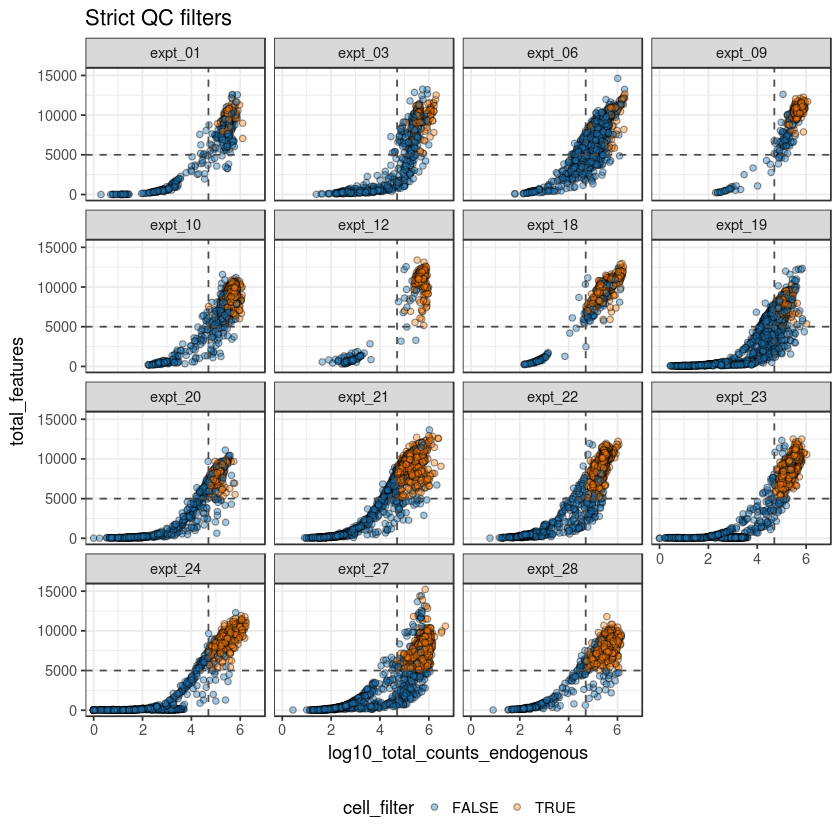

In [26]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts_endogenous, y = total_features,
           fill =  cell_filter)) +
     geom_point(shape = 21, alpha= 0.4) +
     scale_fill_tableau() +
     facet_wrap(~experiment, ncol = 4) + ggtitle("Strict QC filters") +
    geom_hline(yintercept = 5000, linetype = 2, colour = "gray30") +
    geom_vline(xintercept = log10(50000), linetype = 2, colour = "gray30") +
     theme_bw() + theme(legend.position = "bottom")


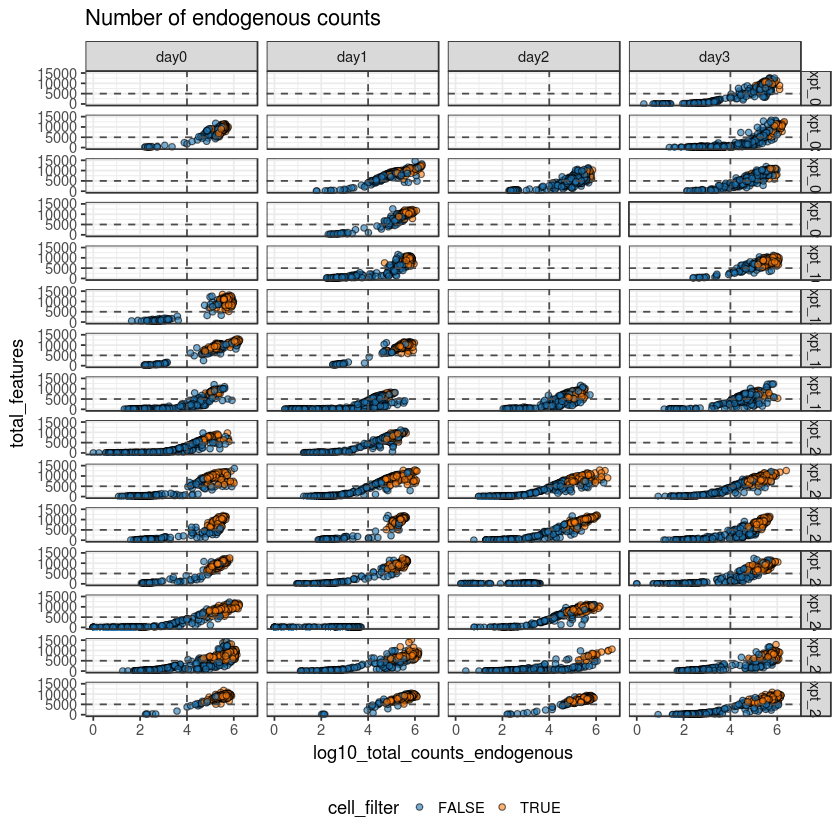

In [27]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts_endogenous, y = total_features,
           fill =  cell_filter)) +
    geom_point(shape = 21, alpha= 0.6) +
    scale_fill_tableau() +
    facet_grid(experiment ~ day) + ggtitle("Number of endogenous counts") +
    geom_hline(yintercept = 5000, linetype = 2, colour = "gray30") +
    geom_vline(xintercept = 4, linetype = 2, colour = "gray30") +
    theme_bw() + theme(legend.position = "bottom")


In [28]:
sce_filt <- sce[, sce$cell_filter]
dim(sce_filt)

[1] 20691  7294

In [ ]:
#mem_used()

In [ ]:
#object_size(sce_filt)


After this filtering we retain **10,639** cells for downstream analysis.




In [29]:
fall <- as.data.frame(table(sce$day, sce$experiment))$Freq
ffilt <- as.data.frame(table(sce_filt$day, sce_filt$experiment))$Freq
matrix(100 * ffilt / fall, nrow = length(unique(sce_filt$day)),
       dimnames = list(sort(unique(sce_filt$day)), sort(unique(sce_filt$experiment)))) %>%  kable



|     |  expt_01|  expt_03|   expt_06|  expt_09|  expt_10|  expt_12|  expt_18|   expt_19|  expt_20|  expt_21|  expt_22|  expt_23|  expt_24|  expt_27|  expt_28|
|:----|--------:|--------:|---------:|--------:|--------:|--------:|--------:|---------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|
|day0 |      NaN| 73.69792|       NaN|      NaN|      NaN| 73.17708| 69.53125| 15.625000| 14.84375| 45.57292| 54.94792| 81.25000| 44.09449| 47.39583| 94.27083|
|day1 |      NaN|      NaN| 15.104167| 74.21875| 53.64583|      NaN| 84.89583|  3.385417| 42.96875| 42.18750| 57.55208| 64.06250|  0.00000| 54.94792| 93.48958|
|day2 |      NaN|      NaN|  3.645833|      NaN|      NaN|      NaN|      NaN| 22.916667|      NaN| 41.92708| 46.61458|  0.00000| 64.06250|  5.46875| 93.48958|
|day3 | 19.01042| 12.23958|  4.427083|      NaN| 76.82292|      NaN|      NaN| 16.927083|      NaN| 53.64583| 41.14583| 55.72917|      NaN| 46.35417| 47.13542|


Table showing number of cells with "unknown" donor:



In [30]:
table(sce$donor == "unknown", sce$experiment) %>% kable



|      | expt_01| expt_03| expt_06| expt_09| expt_10| expt_12| expt_18| expt_19| expt_20| expt_21| expt_22| expt_23| expt_24| expt_27| expt_28|
|:-----|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|
|FALSE |     245|     575|    1067|     361|     682|     301|     707|     607|     394|    1115|     990|     896|     562|    1058|    1365|
|TRUE  |     139|     193|      85|      23|      86|      83|      61|     929|     374|     421|     546|     640|     587|     862|     171|


Table showing number of cells with more than 50,000 endogenous counts,
by experiment:



In [31]:
table(sce$total_counts_endogenous > 50000, sce$experiment) %>% kable



|      | expt_01| expt_03| expt_06| expt_09| expt_10| expt_12| expt_18| expt_19| expt_20| expt_21| expt_22| expt_23| expt_24| expt_27| expt_28|
|:-----|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|
|FALSE |     139|     244|     300|      29|     132|      86|      70|    1032|     456|     776|     691|     726|     707|     954|     230|
|TRUE  |     245|     524|     852|     355|     636|     298|     698|     504|     312|     760|     845|     810|     442|     966|    1306|




Overall QC pass rate for cells:



In [32]:
100 * ncol(sce_filt) / ncol(sce)

[1] 45.23411


We are able to retain a little over 11000 cells for downstream analysis.

# Check donors

## After QC



In [33]:
tb <- table(sce_filt$donor, sce_filt$day)


There are `r length(unique(sce$donor[sce$cell_filter]))` donors that
have at least one QC-passing cell.

`r sum(table(sce$donor[sce$cell_filter]) >= 15)` donors have at least
15 QC-passing cells aggregated across all days.

`r nrow(tb[rowSums(tb) < 100,])` donors with at least 100 QC-passing
cells aggregated across all days.

All donors used:



In [34]:
length(unique(sce$donor[sce$cell_filter]))
sum(table(sce$donor[sce$cell_filter]) >= 15)
#unique(sce_filt$donor)

[1] 71

[1] 64

In [ ]:
# rownames(tb)[tb[, "day0"] >= 15]
# rownames(tb)[tb[, "day1"] >= 15]
# rownames(tb)[tb[, "day2"] >= 15]
# rownames(tb)[tb[, "day3"] >= 15]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


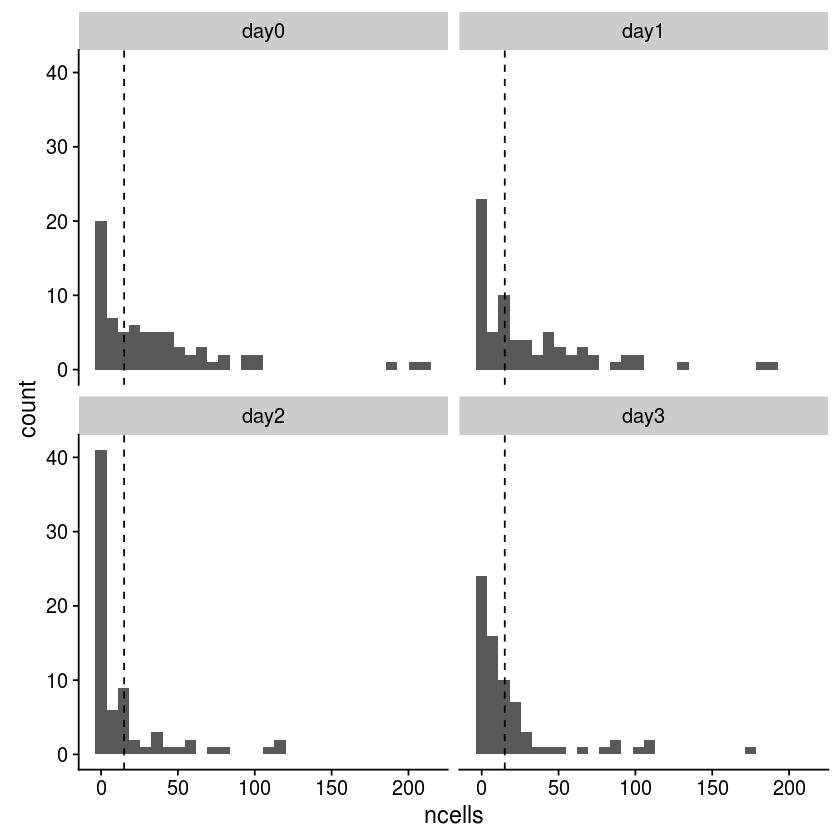

In [35]:
df_ncells <- as_data_frame(table(sce_filt$donor, sce_filt$day))
colnames(df_ncells) <- c("donor", "day", "ncells")
ggplot(df_ncells, aes(x = ncells)) +
    geom_histogram() +
    facet_wrap(~day) +
    geom_vline(xintercept = 15, linetype = 2)


There are `r colSums(tb >= 15)[1]` donors with at least 15 QC-passing day 0 cells.

There are `r colSums(tb >= 15)[2]` donors with at least 15 QC-passing Day 1 cells.

There are `r colSums(tb >= 15)[3]` donors with at least 15 QC-passing Day 2 cells.

There are `r colSums(tb >= 15)[4]` donors with at least 15 QC-passing Day 3 cells .

### Number of cells from each experiment and day that pass the QC



In [36]:
table(sce_filt$donor[sce_filt$experiment == "expt_01"], sce_filt$day[sce_filt$experiment == "expt_01"])
table(sce_filt$donor[sce_filt$experiment == "expt_03"], sce_filt$day[sce_filt$experiment == "expt_03"])
table(sce_filt$donor[sce_filt$experiment == "expt_06"], sce_filt$day[sce_filt$experiment == "expt_06"])
table(sce_filt$donor[sce_filt$experiment == "expt_09"], sce_filt$day[sce_filt$experiment == "expt_09"])
table(sce_filt$donor[sce_filt$experiment == "expt_10"], sce_filt$day[sce_filt$experiment == "expt_10"])
table(sce_filt$donor[sce_filt$experiment == "expt_12"], sce_filt$day[sce_filt$experiment == "expt_12"])
table(sce_filt$donor[sce_filt$experiment == "expt_18"], sce_filt$day[sce_filt$experiment == "expt_18"])
table(sce_filt$donor[sce_filt$experiment == "expt_19"], sce_filt$day[sce_filt$experiment == "expt_19"])
table(sce_filt$donor[sce_filt$experiment == "expt_20"], sce_filt$day[sce_filt$experiment == "expt_20"])
table(sce_filt$donor[sce_filt$experiment == "expt_21"], sce_filt$day[sce_filt$experiment == "expt_21"])
table(sce_filt$donor[sce_filt$experiment == "expt_22"], sce_filt$day[sce_filt$experiment == "expt_22"])
table(sce_filt$donor[sce_filt$experiment == "expt_23"], sce_filt$day[sce_filt$experiment == "expt_23"])
table(sce_filt$donor[sce_filt$experiment == "expt_24"], sce_filt$day[sce_filt$experiment == "expt_24"])
table(sce_filt$donor[sce_filt$experiment == "expt_27"], sce_filt$day[sce_filt$experiment == "expt_27"])
table(sce_filt$donor[sce_filt$experiment == "expt_28"], sce_filt$day[sce_filt$experiment == "expt_28"])

      
       day3
  eika    4
  eipl    2
  kuxp   21
  pahc    4
  podx   21
  xugn   21

      
       day0 day3
  bezi    9    0
  bubh   25    7
  eika    9    4
  ffdm  104   18
  jufd   98   10
  oaaz   38    8

      
       day1 day2 day3
  bima   22    1    4
  ffdm    1    0    0
  lexy   10    3    3
  oapg    5    1    1
  pamv   12    7    5
  rozh    8    2    4

      
       day1
  fafq  115
  hiaf    4
  iisa   45
  joxm   87
  lexy    7
  wuye   27

      
       day1 day3
  fafq   77  100
  garx   23   80
  hayt   26   42
  sebz   11   15
  sojd   27   31
  wopl   42   27

      
       day0
  heth   24
  jogf  102
  pelm   49
  vass   32
  wibj   28
  zapk   46

      
       day0 day1
  oaqd   80   91
  paab   49   61
  sita   69   71
  toss   42   63
  zoio   27   40

      
       day0 day1 day2 day3
  fasu    5    2   18    6
  fuai   13    2   12    5
  kegd    8    2   12    7
  xojn    8    1   10   15
  zerv   15    2   13   15
  zoio   11    4   23   17

      
       day0 day1
  fasu   20   39
  iudw   15   52
  kajh   11   48
  tavh    2   11
  tout    9   15

      
       day0 day1 day2 day3
  dixh   45   48   73   86
  fawm   45   47   45   86
  koqx   16   24   19   16
  naju   29   17    7    6
  oebj   31   19   12    8
  wigw    9    7    5    4

      
       day0 day1 day2 day3
  eoxi   22   18   13    8
  fawm   49   82   64   89
  iudw   34   51   34   12
  oebj   40   18   17   10
  oojs   40   23   18    8
  pulk   26   29   33   31

      
       day0 day1 day3
  guyj  128  105  111
  pulk   56   35   59
  qayj   67   46   21
  seru   61   60   23

      
       day0 day2
  babz   28   46
  guyj   60   77
  iisa   40   57
  oikd   16   16
  walu   24   50

      
       day0 day1 day2 day3
  ffdm  103   63    7   48
  letw   84   47    2   42
  oilg   44   12    2   21
  quls   44    7    3   11
  rutc   35   22    0   17
  sohd   23   26    4    8
  vazt   31   34    3   31

      
       day0 day1 day2 day3
  iiyk   60   49   36   13
  laey    8   13   16   21
  letw  127  134  116   65
  miaj   38   15   14   13
  poih   64   72  118   37
  rutc   65   76   59   32


Happily, all of the lines that we have sequenced (including monogenic diabetes lines) have genotype data available for our use.



In [37]:
cram2donor <- data.frame(cram_id = sce$sample_id, line_id = sce$donor)
## head(cram2donor)
write_tsv(cram2donor, path = "../../data_processed/merged/20180227/01to28_cram2donor.tsv")


All expression values were quantified using Salmon v0.8.2.

# Filter lowly-expressed genes

We keep genes with at least one count on average across all cells. We also drop feature control genes (ERCCs and MT genes).



In [ ]:
saveRDS(sce, "../../data_processed/merged/20180227/sce_merged_01to28_full_with_qc_labels.rds")

In [2]:
sce = readRDS("../../data_processed/merged/20180227/sce_merged_01to28_full_with_qc_labels.rds")

In [38]:
# cpm(sce_filt) <- scater::calculateCPM(sce_filt)
keep_gene <- (rowMeans(counts(sce_filt)) > 1)
keep_gene <- ((keep_gene | rownames(sce_filt) %in% diff_genes))
table(keep_gene)
sce_filt <- sce_filt[keep_gene,]
sce_filt
object_size(sce_filt)

keep_gene
FALSE  TRUE 
 8992 11699 

class: SingleCellExperiment 
dim: 11699 7294 
metadata(0):
assays(2): tpm counts
rownames(11699): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(52): exprs_collapsed_to ensembl_transcript_id ...
  log10_total_counts_control pct_counts_control
colnames(7294): 20416_1#10 20416_1#11 ... 22710_2#94 22710_2#95
colData names(115): salmon_version samp_type ...
  is_cell_control_control cell_filter
reducedDimNames(0):
spikeNames(0):

1.39 GB


This filtering reduces the number of genes from ~20,000 to just ~10,000.

Now compute logcounts values for the object and save.



In [39]:
logcounts(sce_filt) <- log2(
    calculateCPM(sce_filt, use.size.factors = FALSE) + 1)
#saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_01to28_filt.rds")


# Normalization with *scran* size factors

We can compute the "sum factors" with *scran* and look at their distributions across experiments and days, especially in relation to the number of counts from endogenous features.



In [5]:
sce_filt = readRDS("../../data_processed/merged/20180227/sce_merged_qc_01to28_filt.rds")

In [40]:
source("https://bioconductor.org/biocLite.R")
biocLite("scran")

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.3 (2017-11-30).
Installing package(s) ‘scran’
Warning message in install.packages(pkgs = doing, lib = lib, ...):
“installation of package ‘scran’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'ape', 'bindrcpp', 'bit', 'broom', 'callr', 'caret', 'cluster',
  'CVST', 'data.table', 'DBI', 'ddalpha', 'devtools', 'dplyr', 'dtw',
  'foreign', 'Formula', 'fpc', 'futile.options', 'GGally', 'ggjoy', 'ggridges',
  'ggthemes', 'git2r', 'glmnet', 'htmlTable', 'htmlwidgets', 'httpuv', 'ica',
  'IRdisplay', 'irlba', 'kernlab', 'lambda.r', 'lubridate', 'maps', 'MASS',
  'Matrix', 'modelr', 'mvtnorm', 'nlme', 'NMF', 'pbapply', 'pbdZMQ', 'pillar',
  '

In [41]:
library(scran)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


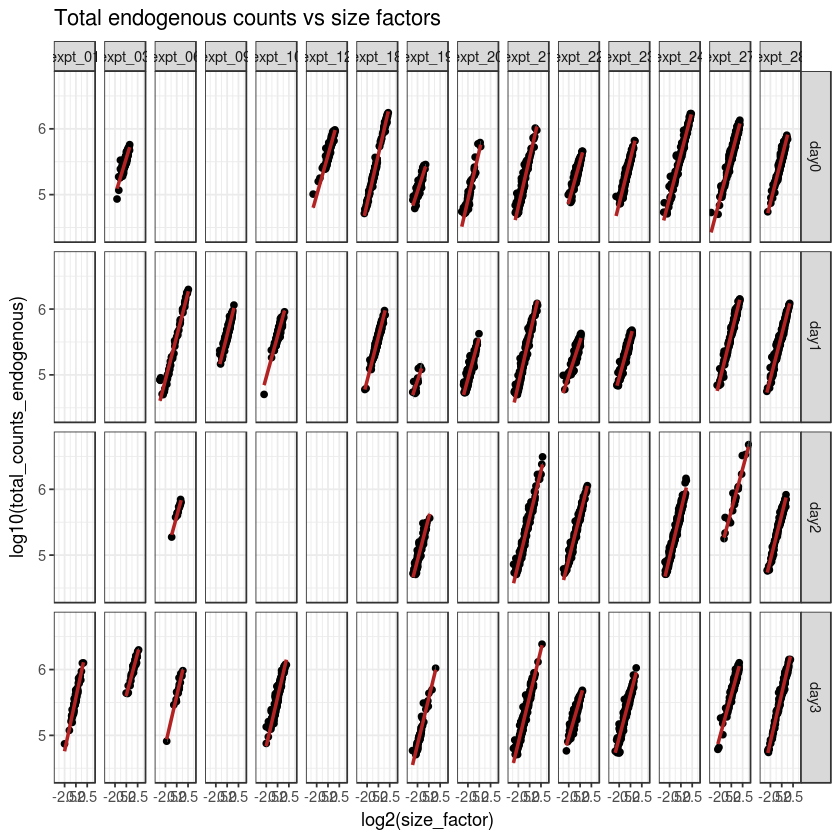

Picking joint bandwidth of 0.249


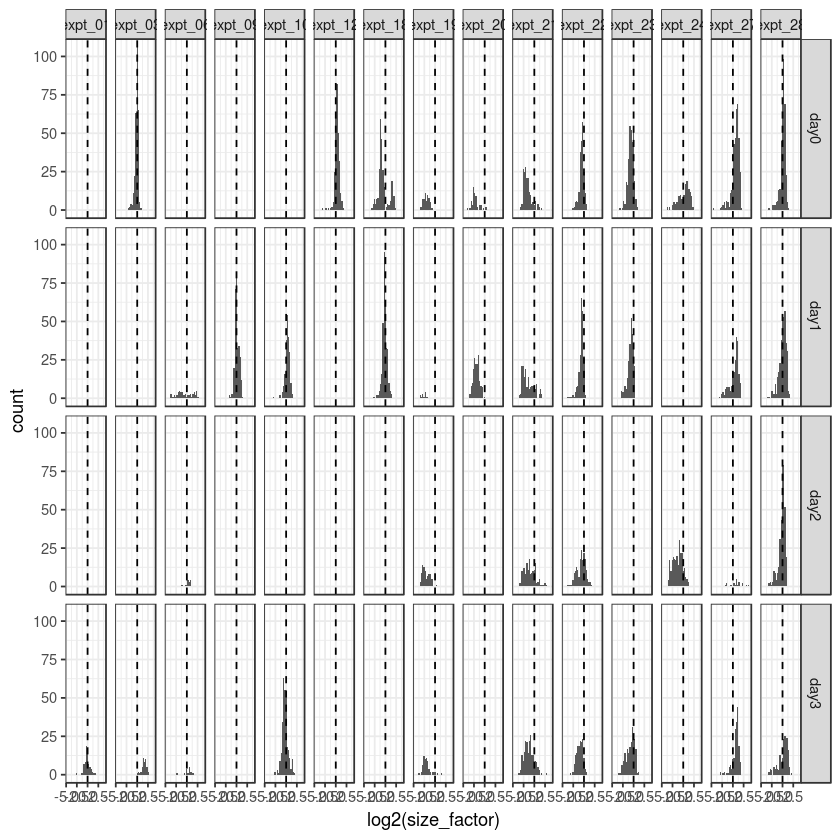

         
          FALSE TRUE
  expt_01    73    0
  expt_03   330    0
  expt_06    89    0
  expt_09   285    0
  expt_10   501    0
  expt_12   281    0
  expt_18   593    0
  expt_19   226    0
  expt_20   222    0
  expt_21   704    0
  expt_22   769    0
  expt_23   772    0
  expt_24   414    0
  expt_27   773    1
  expt_28  1261    0

         
          FALSE
  expt_01    73
  expt_03   330
  expt_06    89
  expt_09   285
  expt_10   501
  expt_12   281
  expt_18   593
  expt_19   226
  expt_20   222
  expt_21   704
  expt_22   769
  expt_23   772
  expt_24   414
  expt_27   774
  expt_28  1261

[1] 1

[1] 0.000137099

[1] 114

[1] 0.01562928

[1] 333

[1] 0.04565396

[1] 841

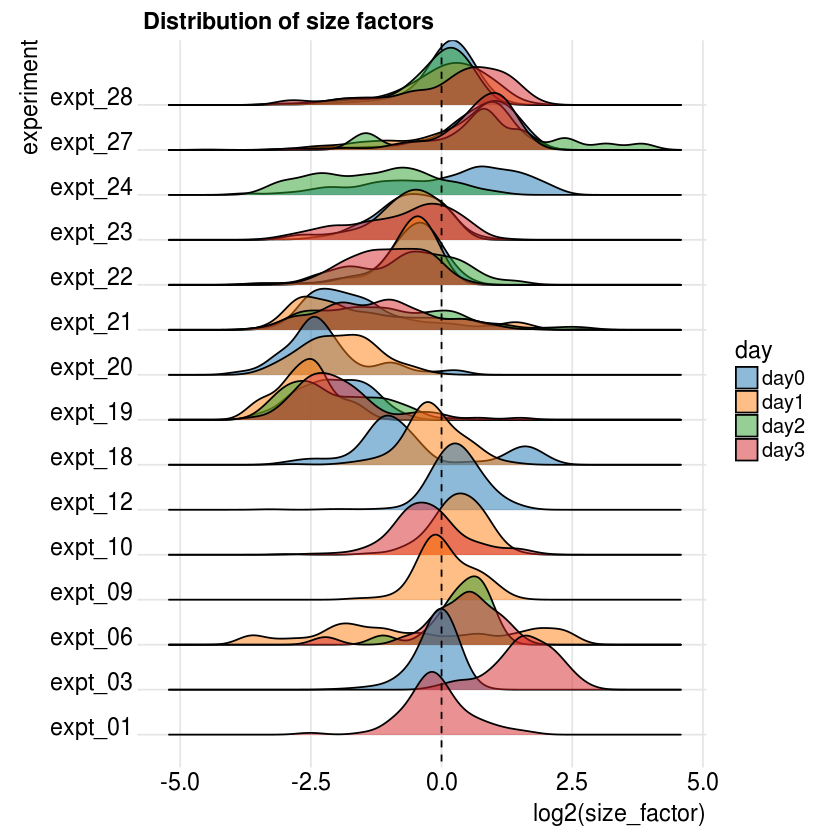

In [42]:
#sce_filt <- readRDS(file = "../../data_processed/merged/sce_merged_qc_filt.rds")
isSpike(sce_filt, "ERCC") <- grepl("^ERCC-", rownames(sce_filt))
clusters <- scran::quickCluster(sce_filt, min.size = 400, method = "igraph",
                         subset.row = sample(nrow(sce_filt), size = 3000))
sce_filt <- computeSumFactors(sce_filt, cluster = clusters)
#sce_filt <- computeSpikeFactors(sce_filt, general.use = FALSE)

sce_filt$size_factor <- sizeFactors(sce_filt)

colData(sce_filt) %>% as.data.frame %>%
    ggplot(aes(x = log2(size_factor), y = log10(total_counts_endogenous))) +
    geom_point() + geom_smooth(method = "lm", colour = "firebrick") +
    facet_grid(day ~ experiment) + theme_bw() +
    ggtitle("Total endogenous counts vs size factors")

colData(sce_filt) %>% as.data.frame %>%
    ggplot(aes(x = log2(size_factor))) +
    geom_histogram() + geom_vline(xintercept = 0, linetype = 2) +
    facet_grid(day ~ experiment) + theme_bw()

colData(sce_filt) %>% as.data.frame %>%
    ggplot(aes(x = log2(size_factor), y = experiment, fill = day)) +
    geom_density_ridges(alpha = 0.5) + geom_vline(xintercept = 0, linetype = 2) +
    theme_ridges() + ggtitle("Distribution of size factors") +
    scale_fill_tableau()

table(sce_filt$experiment, sizeFactors(sce_filt) < 0.05)

table(sce_filt$experiment, sizeFactors(sce_filt) > 20)

sum(sizeFactors(sce_filt) > 20 | sizeFactors(sce_filt) < 0.05)

mean(sizeFactors(sce_filt) > 20 | sizeFactors(sce_filt) < 0.05)

sum(sizeFactors(sce_filt) > 8 | sizeFactors(sce_filt) < 1 / 8)
mean(sizeFactors(sce_filt) > 8 | sizeFactors(sce_filt) < 1 / 8)
sum(sizeFactors(sce_filt) > 6 | sizeFactors(sce_filt) < 1 / 6)
mean(sizeFactors(sce_filt) > 6 | sizeFactors(sce_filt) < 1 / 6)
sum(sizeFactors(sce_filt) > 4 | sizeFactors(sce_filt) < 1 / 4)


We will remove another 1.5% of cells with size factors <0.125 or greater than 8.

Very high correlation between size factors and total counts from endogenous features (both on the log scale).



In [43]:
sce_filt <- sce_filt[, (sizeFactors(sce_filt) < 8 & sizeFactors(sce_filt) > 0.125)]

In [44]:
summary(sizeFactors(sce_filt))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1250  0.5064  0.8647  1.0110  1.2923  7.2405 


These look more reasonable now, so we will go with this set of cells and size factors.



In [45]:
dim(sce_filt)

[1] 11699  7180


Now normalize the expression data using these *scran* size factors.



In [46]:
sce_filt <- normalize(sce_filt)

Warning message in .local(object, ...):
“spike-in transcripts in 'ERCC' should have their own size factors”

In [ ]:
## unique(which(is.na(exprs(sce_filt)), arr.ind = TRUE)[,2])
## length(unique(which(is.na(exprs(sce_filt)), arr.ind = TRUE)[,2]))

In [47]:
prle <- plotRLE(sce_filt[!rowData(sce_filt)$is_feature_control,],
                list(exprs = "exprs"), exprs_logged = TRUE,
                colour_by = "experiment", style = "minimal")

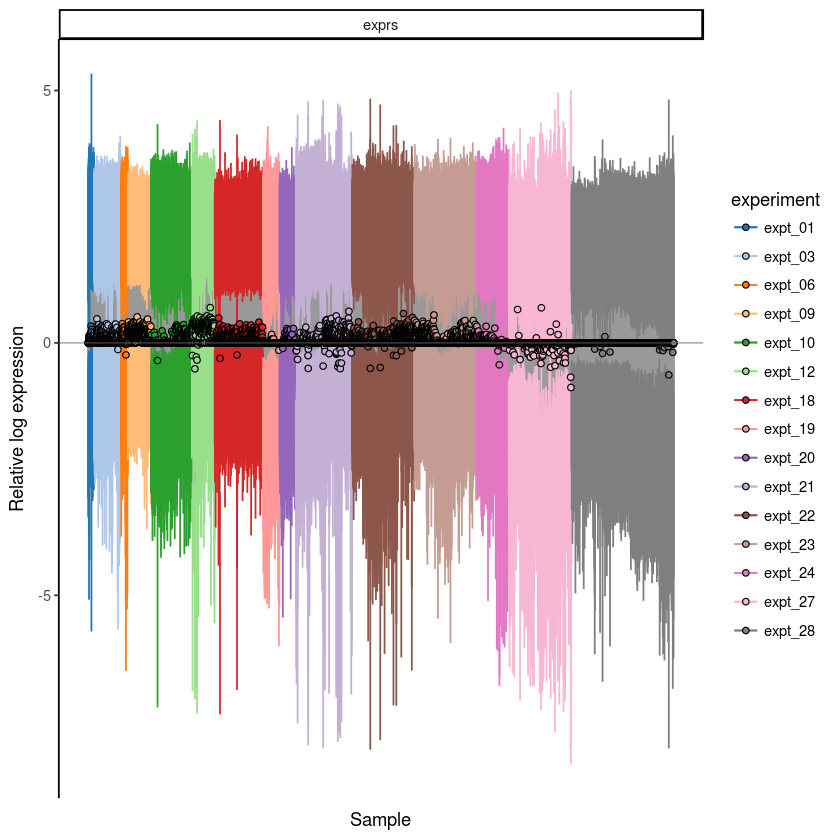

In [48]:
prle

In [ ]:
#ggsave(filename = "../../figures/rle_plot_qc_merged_no_outliers_01to28_20180227.png", plot = prle, height = 9, width = 15)


![RLE plot without outliers](../../figures/rle_plot_qc_merged_no_outliers_20180227.png)



In [49]:
#saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_filt_20180227.rds")
saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_01to28_filt.rds")


# Identify highly variable genes



In [50]:
sce_filt

class: SingleCellExperiment 
dim: 11699 7180 
metadata(1): log.exprs.offset
assays(3): tpm counts logcounts
rownames(11699): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(52): exprs_collapsed_to ensembl_transcript_id ...
  log10_total_counts_control pct_counts_control
colnames(7180): 20416_1#10 20416_1#11 ... 22710_2#94 22710_2#95
colData names(116): salmon_version samp_type ... cell_filter
  size_factor
reducedDimNames(0):
spikeNames(1): ERCC

`geom_smooth()` using method = 'gam'


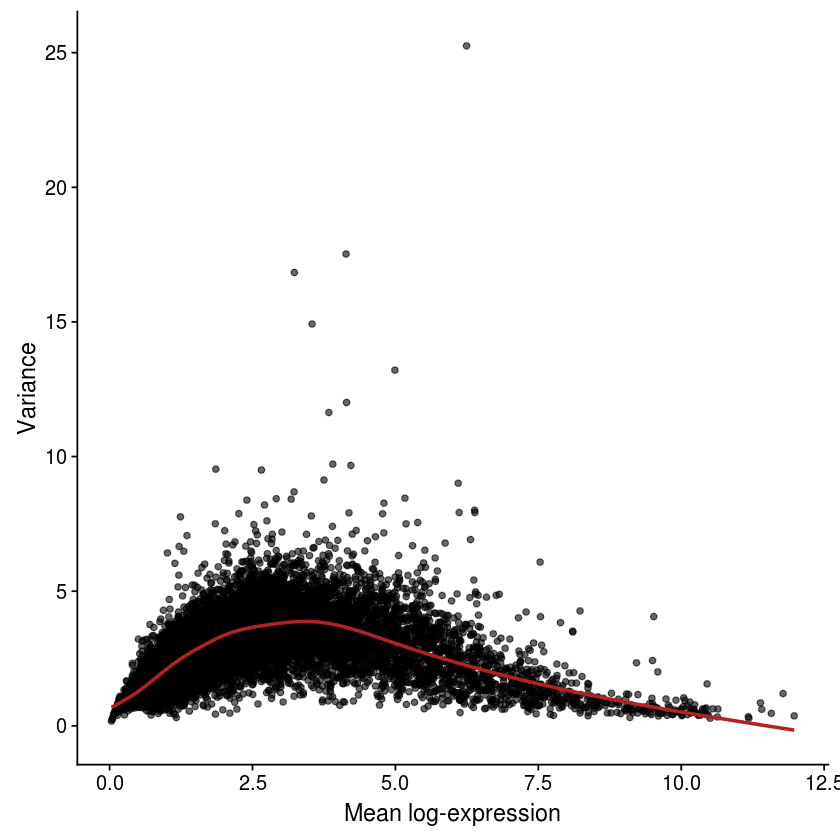

In [52]:
#sce_filt <- readRDS("../../data_processed/merged/20180227/sce_merged_qc_01to28_filt.rds")
design <- model.matrix(~experiment, data = colData(sce_filt))
alt.fit <- trendVar(sce_filt, design = design, use.spikes = FALSE)
alt.decomp <- decomposeVar(sce_filt, alt.fit)

data_frame(mean = alt.decomp$mean, total = alt.decomp$total,
           tech = alt.decomp$tech) %>%
    ggplot(aes(x = mean, y = total)) +
    geom_point(alpha = 0.6) +
    geom_smooth(aes(x = mean, y = tech), colour = "firebrick") +
    ylab("Variance") + xlab("Mean log-expression")


In [53]:
top.hvgs <- order(alt.decomp$bio, decreasing = TRUE)
head(alt.decomp[top.hvgs,])
dim(alt.decomp)
sum(alt.decomp$FDR < 0.05, na.rm = TRUE)
sum(alt.decomp$FDR < 0.01, na.rm = TRUE)
sum(alt.decomp$bio >= 0.1 * alt.decomp$tech)
hvgs <- rownames(alt.decomp[alt.decomp$FDR < 0.01,])
length(hvgs)
diff_genes[diff_genes %in% hvgs]

mean     total    bio      tech     p.value FDR
ENSG00000147869_CER1    6.244366 25.25396 23.03130 2.222669 0       0  
ENSG00000158815_FGF17   4.136079 17.52299 13.88241 3.640579 0       0  
ENSG00000104371_DKK4    3.232433 16.83536 12.98766 3.847707 0       0  
ENSG00000095596_CYP26A1 3.541945 14.92218 11.10731 3.814872 0       0  
ENSG00000185155_MIXL1   4.989993 13.20847 10.05276 3.155702 0       0  
ENSG00000149591_TAGLN   4.145828 12.00928  8.37292 3.636364 0       0

[1] 11699     6

[1] 4707

[1] 4567

[1] 3695

[1] 4567

[1] "ENSG00000111704_NANOG"  "ENSG00000204531_POU5F1" "ENSG00000181449_SOX2"  
 [4] "ENSG00000164458_T"      "ENSG00000163508_EOMES"  "ENSG00000185155_MIXL1" 
 [7] "ENSG00000121966_CXCR4"  "ENSG00000136574_GATA4"  "ENSG00000141448_GATA6" 
[10] "ENSG00000164736_SOX17"  "ENSG00000133937_GSC"    "ENSG00000147869_CER1"  
[13] "ENSG00000132130_LHX1"   "ENSG00000152804_HHEX"

`geom_smooth()` using method = 'gam'


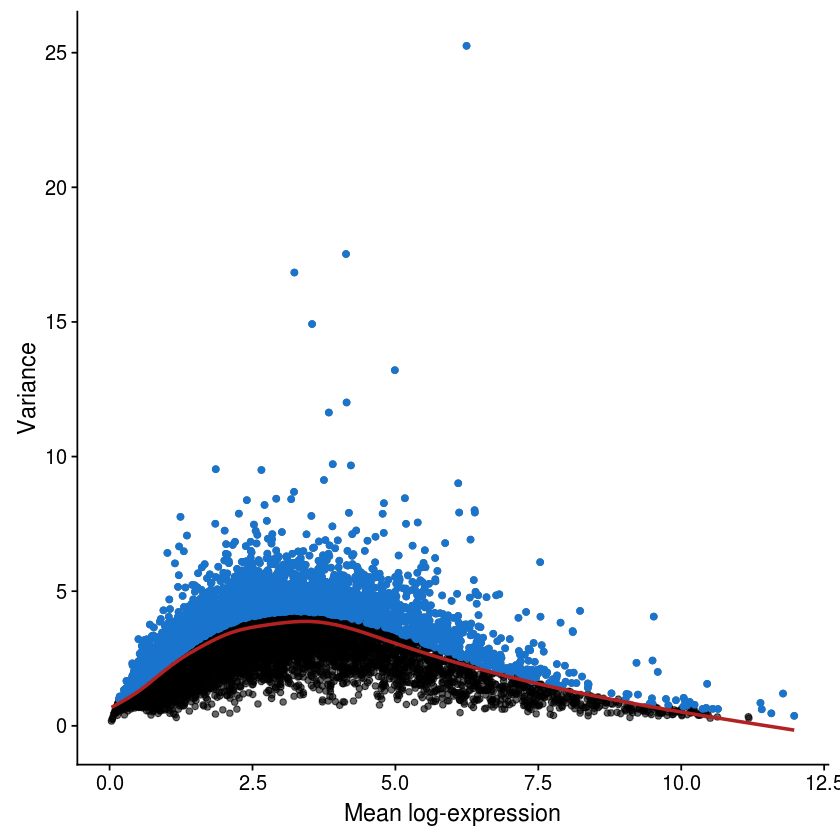

In [54]:
vardecomp <-  data_frame(mean = alt.decomp$mean, total = alt.decomp$total,
           tech = alt.decomp$tech, bio = alt.decomp$bio)
ggplot(vardecomp, aes(x = mean, y = total)) +
    geom_point(alpha = 0.6) +
    geom_point(aes(x = mean, y = total), colour = "dodgerblue3",
               data = dplyr::filter(vardecomp, bio >= 0.1 * tech)) +
    geom_smooth(aes(x = mean, y = tech), colour = "firebrick") +
    ylab("Variance") + xlab("Mean log-expression")

In [55]:
null.dist <- correlateNull(design = design) # fewer iterations can to speed it up.
# cor.genes <- correlatePairs(sce_filt[top.hvgs,], null.dist=null.dist, per.gene=TRUE)
# head(cor.genes)
cor.pairs <- correlatePairs(sce_filt[hvgs,], null.dist=null.dist, design=design)
head(cor.pairs)
g1 <- cor.pairs$gene1[cor.pairs$FDR < 0.05]
g2 <- cor.pairs$gene2[cor.pairs$FDR < 0.05]
high_cor_genes <- unique(c(g1, g2))

gene1                    gene2                    rho       p.value     
1 ENSG00000230903_RPL9P8   ENSG00000237550_UBE2Q2P6 0.9997930 1.999998e-06
2 ENSG00000182217_HIST2H4B ENSG00000183941_HIST2H4A 0.9193287 1.999998e-06
3 ENSG00000094755_GABRP    ENSG00000164265_SCGB3A2  0.8587728 1.999998e-06
4 ENSG00000071082_RPL31    ENSG00000213741_RPS29    0.7963070 1.999998e-06
5 ENSG00000177954_RPS27    ENSG00000229117_RPL41    0.7904532 1.999998e-06
6 ENSG00000071082_RPL31    ENSG00000177954_RPS27    0.7851753 1.999998e-06
  FDR          limited
1 1.650102e-05 TRUE   
2 1.650102e-05 TRUE   
3 1.650102e-05 TRUE   
4 1.650102e-05 TRUE   
5 1.650102e-05 TRUE   
6 1.650102e-05 TRUE


Filter down to an object just containing the
`r length(intersect(high_cor_genes, hvgs))` highly-variable genes.



In [56]:
hvgs <- intersect(high_cor_genes, hvgs)
sce_hvg <- sce_filt[rownames(sce_filt) %in% c(hvgs, diff_genes),]

In [61]:
sce_filt

class: SingleCellExperiment 
dim: 11699 7180 
metadata(1): log.exprs.offset
assays(3): tpm counts logcounts
rownames(11699): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(53): exprs_collapsed_to ensembl_transcript_id ...
  pct_counts_control is_hvg
colnames(7180): 20416_1#10 20416_1#11 ... 22710_2#94 22710_2#95
colData names(116): salmon_version samp_type ... cell_filter
  size_factor
reducedDimNames(0):
spikeNames(1): ERCC

In [57]:
saveRDS(object = sce_hvg, file = "../../data_processed/merged/20180227/sce_merged_qc_01to28_hvg.rds")
#sce_hvg = readRDS("../../data_processed/merged/20180227/sce_merged_qc_01to28_hvg.rds")


rowData(sce_filt)$is_hvg <- rownames(sce_filt) %in% hvgs
#saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_filt_20180227.rds")
saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_01to28_filt.rds")

sce_hvg

mem_used()

# saveRDS(exprs(sce_hvg), "../../data_processed/merged/20180227/sce_merged_qc_hvg.exprs.rds")

# saveRDS(counts(sce_hvg), "../../data_processed/merged/20180227/sce_merged_qc_hvg.counts.rds")

# saveRDS(colData(sce_hvg), "../../data_processed/merged/20180227/sce_merged_qc_hvg.pdata.rds")

# saveRDS(rowData(sce_hvg), "../../data_processed/merged/20180227/sce_merged_qc_hvg.fdata.rds")

# saveRDS(sce_hvg[, sce_hvg$day == "day0"], "../../data_processed/merged/20180227/sce_merged_qc_hvg_day0.rds")

# saveRDS(sce_hvg[, sce_hvg$day == "day1"], "../../data_processed/merged/20180227/sce_merged_qc_hvg_day1.rds")

# saveRDS(sce_hvg[, sce_hvg$day %in% c("day2", "day3")], "../../data_processed/merged/20180227/sce_merged_qc_hvg_day2-3.rds")

# saveRDS(sce_filt[rownames(sce_filt) %in% c(high_cor_genes, diff_genes), sce_filt$cell_filter], "../../data_processed/merged/20180227/sce_merged_strict_qc_hvg.rds")

class: SingleCellExperiment 
dim: 4571 7180 
metadata(1): log.exprs.offset
assays(3): tpm counts logcounts
rownames(4571): ENSG00000001626_CFTR ENSG00000002330_BAD ...
  ENSG00000269858_EGLN2 ENSG00000269891_ARHGAP19-SLIT1
rowData names(52): exprs_collapsed_to ensembl_transcript_id ...
  log10_total_counts_control pct_counts_control
colnames(7180): 20416_1#10 20416_1#11 ... 22710_2#94 22710_2#95
colData names(116): salmon_version samp_type ... cell_filter
  size_factor
reducedDimNames(0):
spikeNames(1): ERCC

9.74 GB


Save datasets for QTL analysis (keeping donors with >=15 cells passing QC).



In [ ]:
# tb <- table(sce_hvg$donor, sce_hvg$day)
# donors_day0 <- rownames(tb)[tb[, "day0"] >= 15]
# write_tsv(data_frame(donor = sort(rownames(tb)[tb[, "day0"] >= 15])),
#           path = "../../qtls/day0_donors_20180227.tsv",
#           col_names = FALSE)
# donors_day1 <- rownames(tb)[tb[, "day1"] >= 15]
# donors_day2 <- rownames(tb)[tb[, "day2"] >= 15]
# donors_day3 <- rownames(tb)[tb[, "day3"] >= 15]
# donors_alldays <- rownames(tb)[rowSums(tb) >= 50]

# saveRDS(sce_hvg[, (sce_hvg$day == "day0" & sce_hvg$donor %in% donors_day0)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_day0_for_qtl.rds")

# saveRDS(sce_hvg[, (sce_hvg$day == "day1" & sce_hvg$donor %in% donors_day1)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_day1_for_qtl.rds")

# saveRDS(sce_hvg[, (sce_hvg$day == "day2" & sce_hvg$donor %in% donors_day2)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_day2_for_qtl.rds")

# saveRDS(sce_hvg[, (sce_hvg$day == "day3" & sce_hvg$donor %in% donors_day3)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_day3_for_qtl.rds")


# saveRDS(sce_hvg[, (sce_hvg$donor %in% donors_alldays)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_alldays_for_qtl.rds")





# Visualize filtered dataset

We take a look at the normalized, filtered dataset using some common dimension reduction techniques (PCA, diffusion maps, t-SNE).

## RLE plot



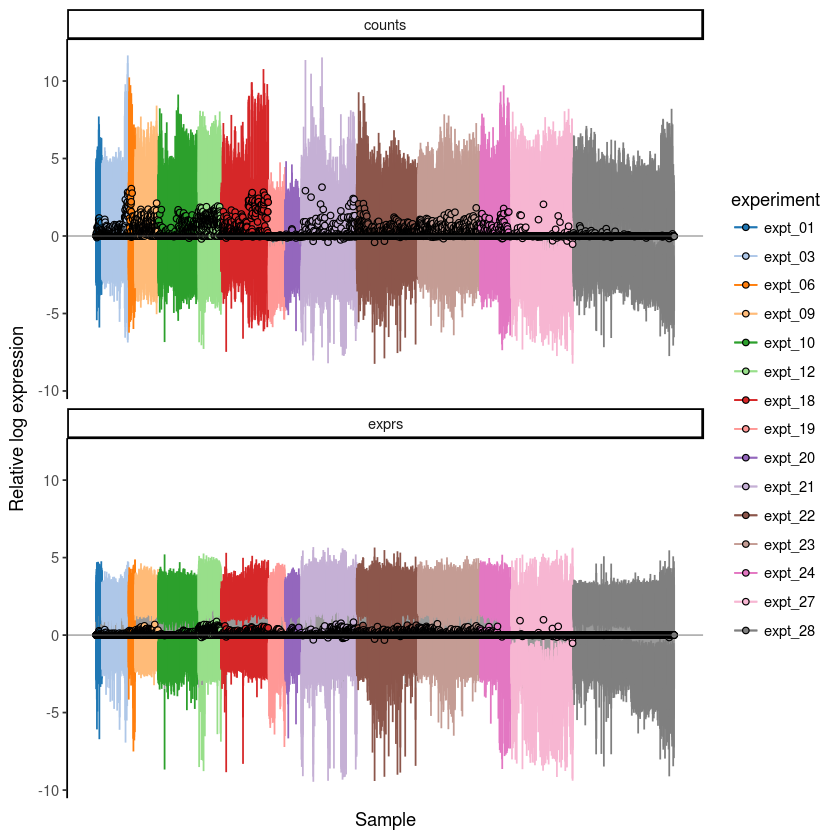

In [58]:
prle <- plotRLE(sce_hvg, list(counts = "counts", exprs = "exprs"),
                exprs_logged = c(FALSE, TRUE),
                colour_by = "experiment", style = "minimal")
prle


## PCA plots

We can show overall structure amongst QC cells with simple PCA plots.



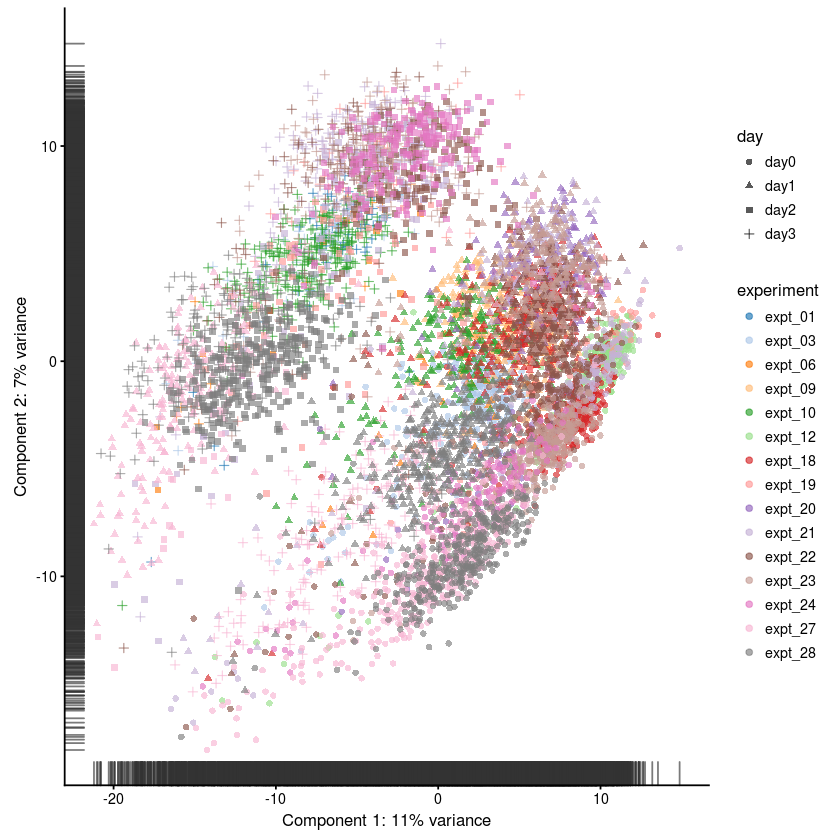

In [59]:
sce_hvg <- plotPCA(sce_hvg, colour_by = "experiment", shape_by = "day",
                   return_SCE = TRUE, ncomponents = 2, draw_plot = TRUE)

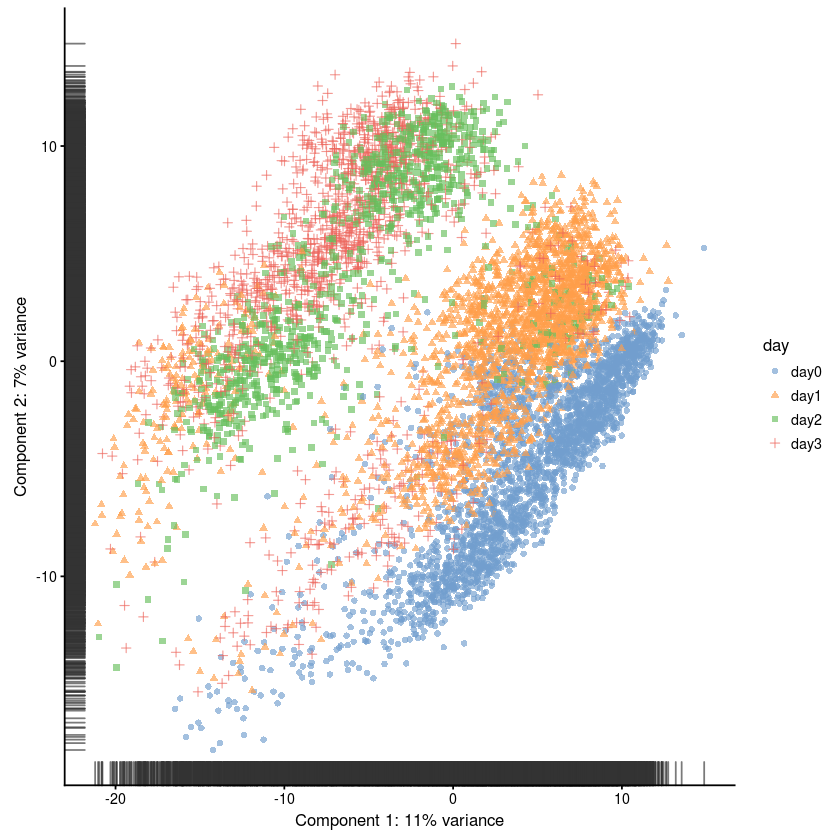

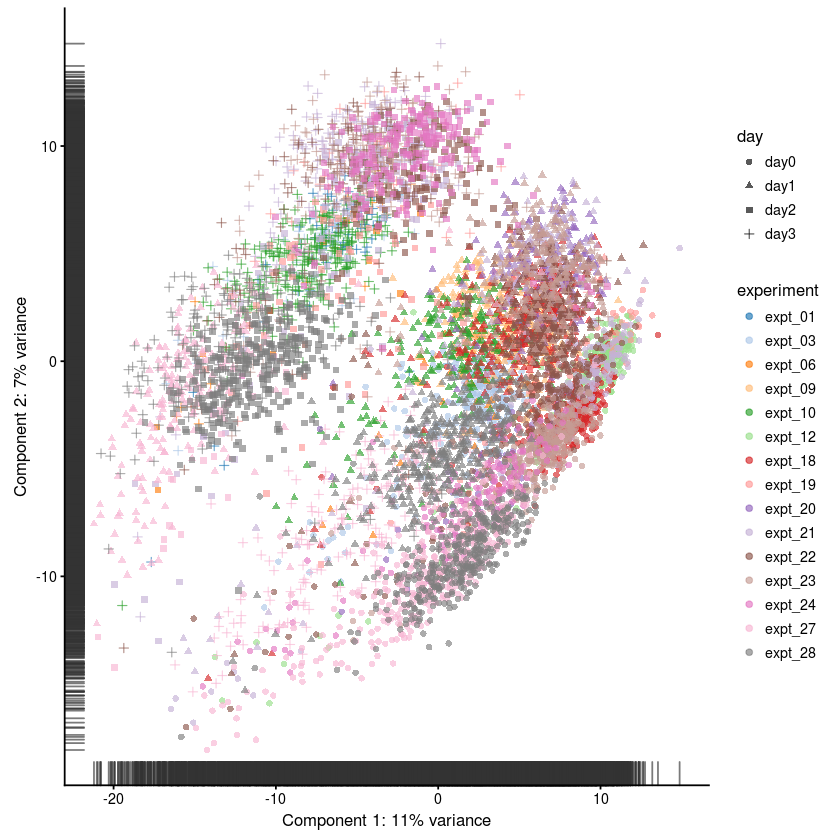

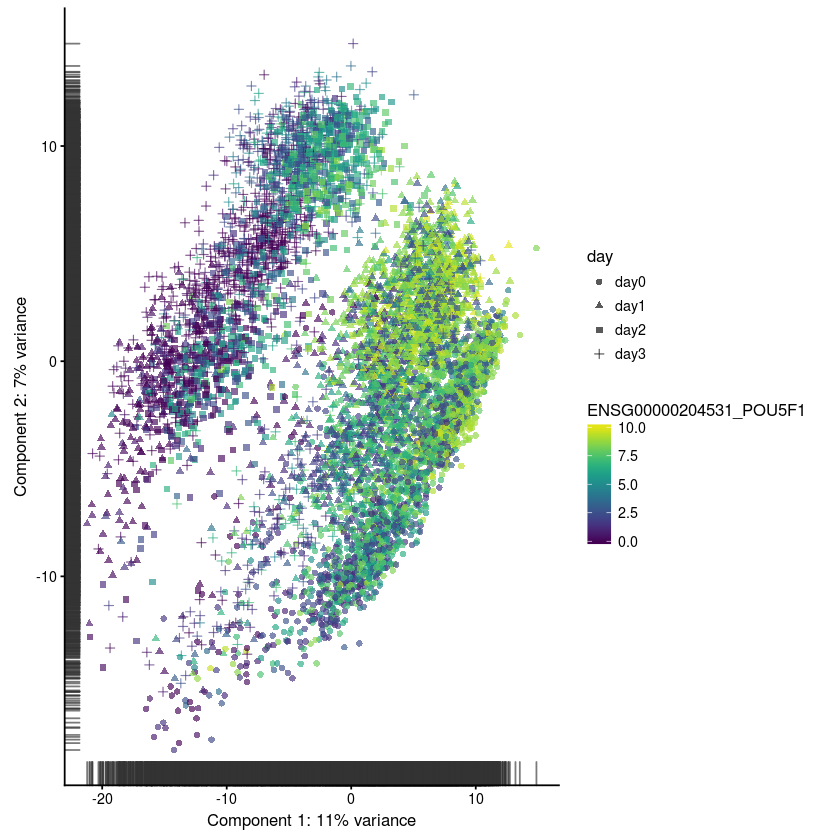

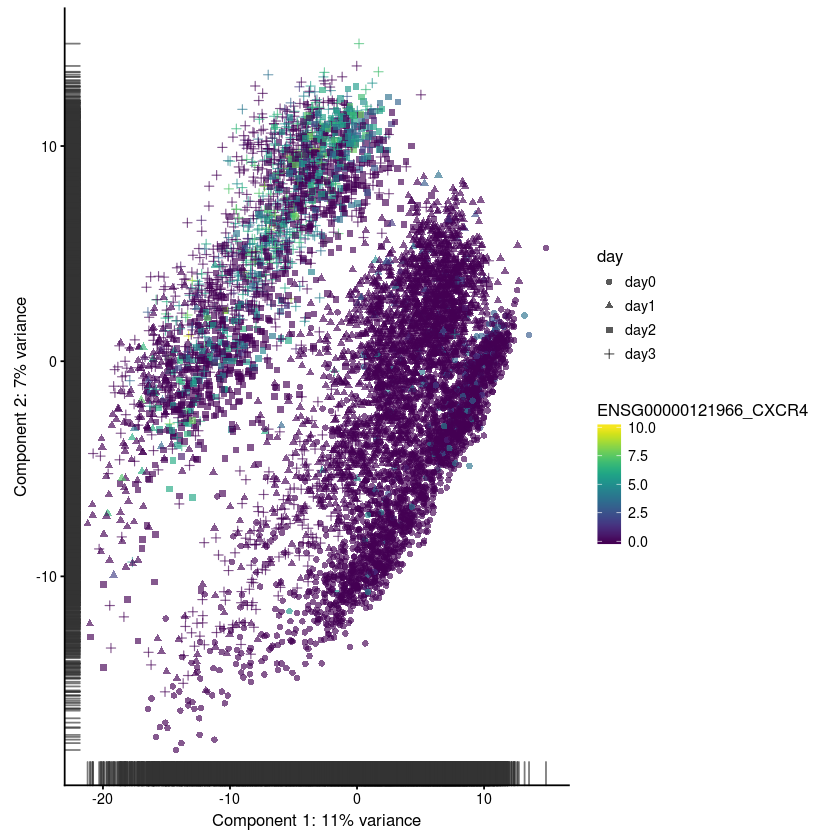

In [60]:

plotReducedDim(sce_hvg, use_dimred = "PCA", colour_by = "day", shape_by = "day")
plotReducedDim(sce_hvg, use_dimred = "PCA", colour_by = "experiment", shape_by = "day")
plotReducedDim(sce_hvg, use_dimred = "PCA",
               colour_by = "ENSG00000204531_POU5F1", shape_by = "day")
plotReducedDim(sce_hvg, use_dimred = "PCA",
               colour_by = "ENSG00000121966_CXCR4", shape_by = "day")






# Session Info



In [ ]:
sessionInfo()